In [130]:
import altair

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from dfply import *
from plotnine import *

# Import the required packages
import plotly.express as px # Express Plotting Library, cuz it's easier to get started
import plotly.graph_objects as go # Base/ore Plotting Library
import plotly.figure_factory as ff # Import figure factory
import plotly

# to render plotly on Github
import plotly.io as pio

pio.renderers


# For running linear regressions, ANOVA, etc
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import researchpy as rp
import missingno as msn

import sys
import kaleido


In [131]:
# !pip show pandas

# !pip install -U kaleido
# !pip install --upgrade pip
# !{sys.executable} -m pip install --upgrade pip
# !{sys.executable} -m pip install kaleido

In [132]:
# import sys
# !{sys.executable} -m pip install researchpy

In [133]:
fileName = "Test_Participants.xlsx"

participantsdf = pd.read_excel(fileName)
print(participantsdf.shape)

(187, 14)


In [134]:
fileName = "Preliminary_Interest_Text.xlsx"
interestForm = pd.read_excel(fileName)
interestForm = interestForm.iloc[1:, :]
# interestForm.head()
print(interestForm.shape)

(615, 32)


In [135]:
# Want only a couple columns; not everything..
interestForm2 = interestForm[['Full Name', 'Phone Number',
       'Email', 'Gender', 'Age (years)',
       'Indicate your religious affiliation - Selected Choice',
       'Indicate your religious affiliation - Other (please specify) - Text',
       'Are you practicing or not practicing?',
       'What is your highest level of education?',
       'Why are you interested in becoming part of the global safeguarding study?\nResponses need not to be long. We are simply interested in hearing your response.',
       'Have you experienced any form of abuse (neglect, emotional, sexual, psychological, physical, etc)?',
       'If so, have you sought treatment for the abuse?',
       'Might you allow us to ask, how you have managed this?',
       'Do you feel capable of listening to or listening or viewing stories of individuals who have suffered sexual abuse?',
       'If these questions have caused you any stress, are you aware of resources that you can use?']]
print(interestForm2.shape)

(615, 15)


<AxesSubplot:>

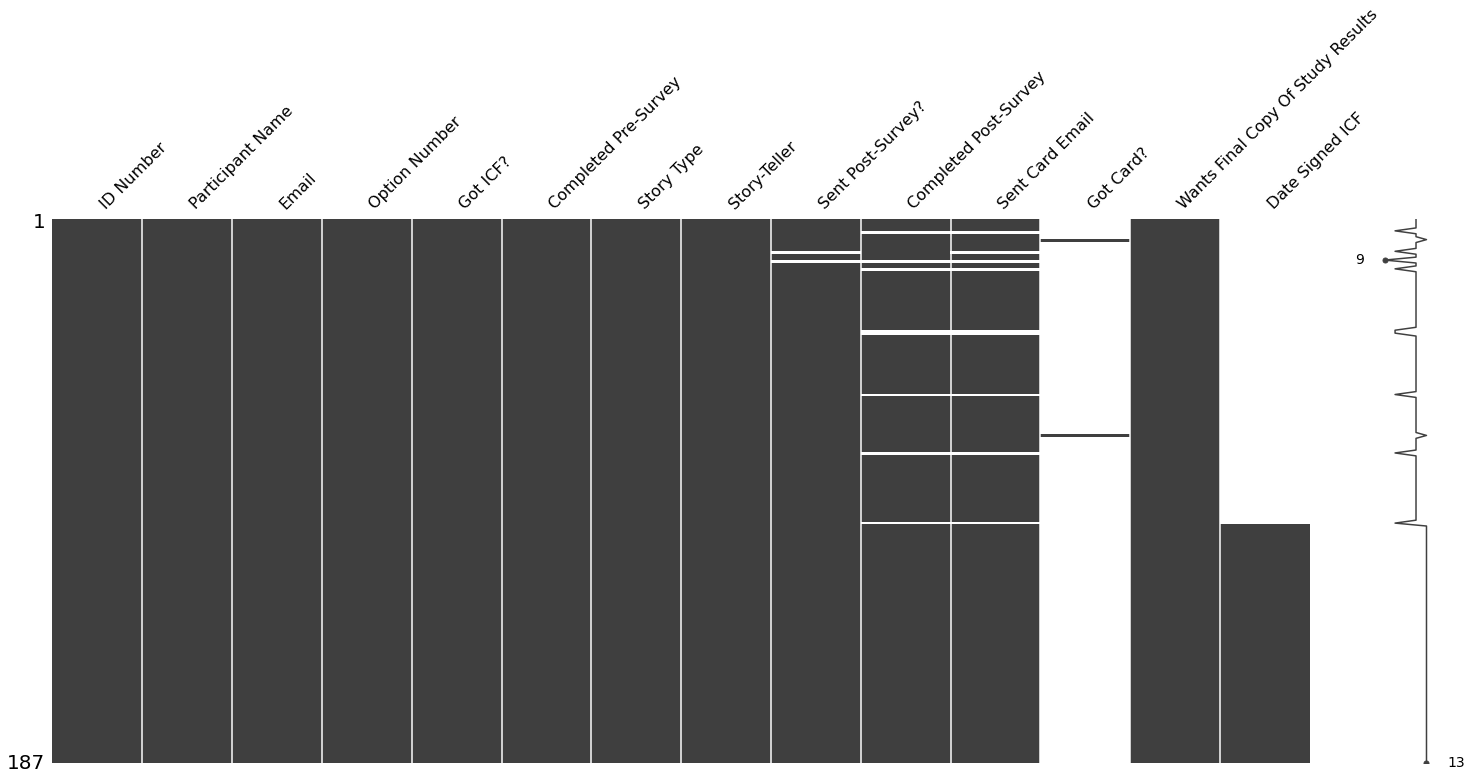

In [136]:
msn.matrix(participantsdf)

In [137]:
participantsdf["Completed Post-Survey"].fillna(0, inplace = True)
participantsdf["Sent Card Email"].fillna(0, inplace = True)

# grbabing only the participants who actually completed the exam
participantsdf2 = participantsdf[participantsdf["Sent Card Email"] == 1]

In [138]:
# Join Participantsdf with interestForm df. Join by Email
activeParticipants = pd.merge(participantsdf2, interestForm2, left_on='Email', right_on='Email')
print(activeParticipants.shape)
print(activeParticipants.columns)

(155, 28)
Index(['ID Number', 'Participant Name', 'Email', 'Option Number', 'Got ICF?',
       'Completed Pre-Survey', 'Story Type', 'Story-Teller',
       'Sent Post-Survey?', 'Completed Post-Survey', 'Sent Card Email',
       'Got Card?', 'Wants Final Copy Of Study Results', 'Date Signed ICF',
       'Full Name', 'Phone Number', 'Gender', 'Age (years)',
       'Indicate your religious affiliation - Selected Choice',
       'Indicate your religious affiliation - Other (please specify) - Text',
       'Are you practicing or not practicing?',
       'What is your highest level of education?',
       'Why are you interested in becoming part of the global safeguarding study?\nResponses need not to be long. We are simply interested in hearing your response.',
       'Have you experienced any form of abuse (neglect, emotional, sexual, psychological, physical, etc)?',
       'If so, have you sought treatment for the abuse?',
       'Might you allow us to ask, how you have managed this?',
   

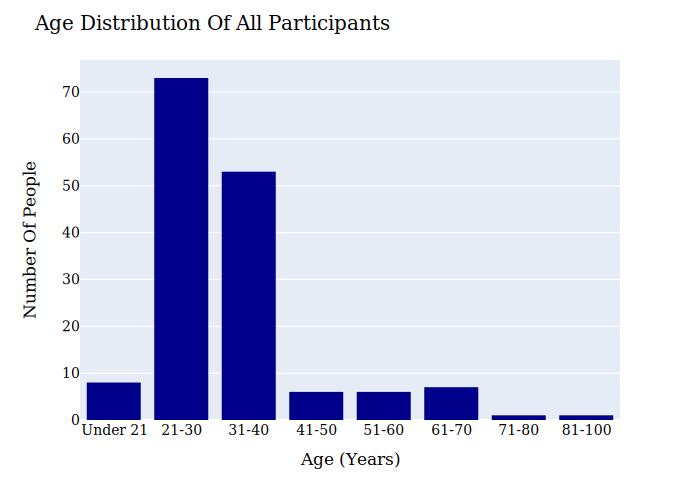

In [139]:
def ageDistribution(df, color = "darkblue", title = "Age Distribution Of Participants"):
    '''
    Plots the age distribution of the people in this df
    
    @param DataFrame df the given dataframe
    '''
    fig = px.histogram(
        df,
        x = "Age (years)",
        color_discrete_sequence = [color],
    #     y = "weightedMean"
    )
    # Bar graph descending order
    fig.update_layout(
        barmode='stack', xaxis={'categoryorder': "array", 
                                "categoryarray" : ["Under 21", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-100"]},
        title= title,
        xaxis_title= "Age (Years)",
        yaxis_title= "Number Of People",
        font=dict(
            family="Georgia",
            size=14,
    #         color="#7f7f7f"
            color = "black"
        )
    )

    fig.show(renderer="svg")
ageDistribution(activeParticipants, title = "Age Distribution Of All Participants")

In [140]:
# fig.write_image("images/Age_Distribution_All_Participants.png")
activeParticipants["Age (years)"].value_counts()/activeParticipants.shape[0] * 100

21-30       47.096774
31-40       34.193548
Under 21     5.161290
61-70        4.516129
51-60        3.870968
41-50        3.870968
81-100       0.645161
71-80        0.645161
Name: Age (years), dtype: float64

47.1% of participants here are around 20s to late 30s, with the age group 21-30 the most popular age group. There were less than 10 people in all the other age groups. 34.2% of the participants were between 31-40. 

5.1% of participants were under 21. 4.5% were between 61-70. 3.9% were between 51-60. 3.9% were between 41-50. 0.6% were 81-100, 0.7% were between 71-80.

In [141]:
# activeParticipants["What is your highest level of education?"].unique()

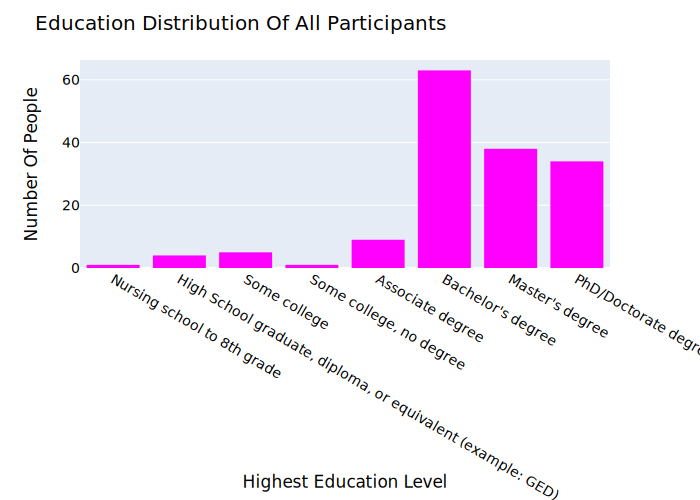

In [142]:

def educationDistribution(df, color = "magenta", title = "Education Distribution Of Participants"):
    '''
    Graphs the highest education distribution of people in a dataframe
    
    @param DataFrame df the given dataframe
    '''
    fig = px.histogram(
        df,
        x = "What is your highest level of education?",
        color_discrete_sequence =[color]
    #     y = "weightedMean"
    )
    # Bar graph descending order
    fig.update_layout(
        barmode='stack', xaxis={'categoryorder':'array',
                               "categoryarray": ["Nursing school to 8th grade", 
                                                 "High School graduate, diploma, or equivalent (example: GED)",
                                                 'Some college',
                                                 'Some college, no degree',
                                                 "Associate degree",
                                                 "Bachelor's degree",
                                                 "Master's degree",
                                                 'PhD/Doctorate degree',
                                                ]},
        title= title,
        xaxis_title= "Highest Education Level",
        yaxis_title= "Number Of People",
        font=dict(
            family="Comic Sans",
            size=14,
    #         color="#7f7f7f"
            color = "black"
        )
    )

    fig.show(renderer="svg")
    
educationDistribution(activeParticipants, title = "Education Distribution Of All Participants")

In [143]:
activeParticipants["What is your highest level of education?"].value_counts()/activeParticipants.shape[0] * 100

Bachelor's degree                                              40.645161
Master's degree                                                24.516129
PhD/Doctorate degree                                           21.935484
Associate degree                                                5.806452
Some college                                                    3.225806
High School graduate, diploma, or equivalent (example: GED)     2.580645
Nursing school to 8th grade                                     0.645161
Some college, no degree                                         0.645161
Name: What is your highest level of education?, dtype: float64

The most popular highest education level was Bachelor's degree (63 people, or 40.6% of the participants), followed by Masters Degree (38 people, 24.5% of people), then followed closely by PhD/Doctorate degree (34 people, or 21.9% of people).

9 people got an Associate degree (or 5.8% of people), 6 people got some college (3.8% of people), 4 people graduated high school (2.6% of people), and 1 person made it to only grade 8 (0.6%).

In [144]:
def practicingDistribution(df, color = "magenta", title = "Distribution Of Participants Whether They Actively Practice Or Not"):
    '''
    Plots the distribution of whether some people are practicing their religion or not
    
    @param DataFrame df the given dataframe
    '''

    fig = px.histogram(
        df,
        x = "Are you practicing or not practicing?",
        color_discrete_sequence =[color]
    )
    # Bar graph descending order
    fig.update_layout(
        barmode='stack', xaxis={'categoryorder':'total descending'},
        title= title,
        xaxis_title= "Religion",
        yaxis_title= "Number Of People",
        font=dict(
            family="Georgia",
            size=14,
    #         color="#7f7f7f"
            color = "black"
        )
    )

    fig.show(renderer="svg")


In [145]:
def religionDistribution(df, color = "magenta", title = "Participants' Religion Distribution"):
    '''
    Plots a bar chart distribution of participants' religion
    
    @param DataFrame df the given dataframe
    '''
    
    fig = px.histogram(
        df,
        x = "Indicate your religious affiliation - Selected Choice",
        color_discrete_sequence =[color]
    #     y = "weightedMean"
    )
    # Bar graph descending order
    fig.update_layout(
        barmode='stack', xaxis={'categoryorder':'total descending'},
        title= title,
        xaxis_title= "Religion",
        yaxis_title= "Number Of People",
        font=dict(
            family="Georgia",
            size=14,
    #         color="#7f7f7f"
            color = "black"
        )
    )

    fig.show(renderer="svg")

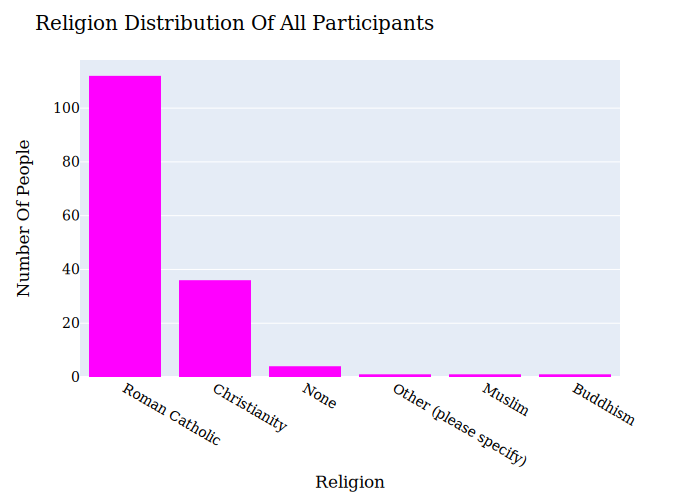

In [146]:
religionDistribution(activeParticipants, title = "Religion Distribution Of All Participants")

In [147]:
activeParticipants["Indicate your religious affiliation - Selected Choice"].value_counts()/activeParticipants.shape[0] * 100

Roman Catholic            72.258065
Christianity              23.225806
None                       2.580645
Buddhism                   0.645161
Muslim                     0.645161
Other (please specify)     0.645161
Name: Indicate your religious affiliation - Selected Choice, dtype: float64

In [148]:
activeParticipants["Indicate your religious affiliation - Other (please specify) - Text"].value_counts()/activeParticipants.shape[0] * 100
# activeParticipants
# activeParticipants["Indicate your religious affiliation - Other (please specify) - Text"].unique()

Practice with Buddhist community as well    0.645161
Name: Indicate your religious affiliation - Other (please specify) - Text, dtype: float64

It appears that the vast, most popular religion was Roman Catholic (112 people, or 72.3% of people). The next popular religion was Christianity (36 people, or 23.2% of people). 1 person was Muslim (or 0.6% of people), 1 person were Buddhist (0.6% of people), and 4 people were not religious (2.6% of people). 1 person (0.6% of people) indicated they were not Buddhist but "Practice with Buddhist community as well".

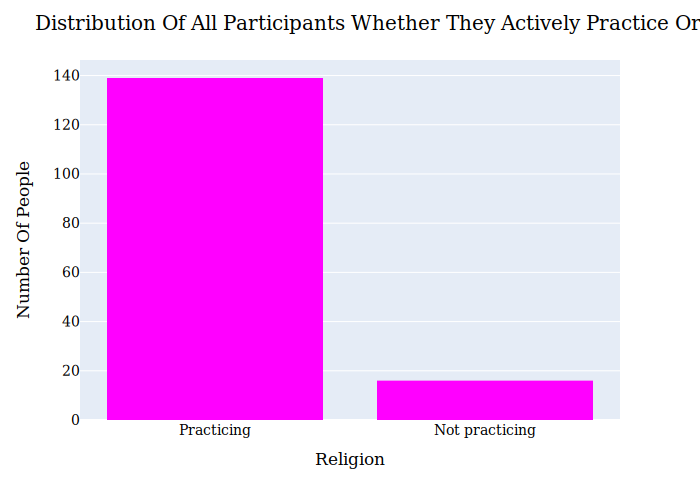

In [149]:
practicingDistribution(activeParticipants, title = "Distribution Of All Participants Whether They Actively Practice Or Not")

In [150]:
activeParticipants["Are you practicing or not practicing?"].value_counts()/activeParticipants.shape[0]*100

Practicing        89.677419
Not practicing    10.322581
Name: Are you practicing or not practicing?, dtype: float64

139 people (or 89.7% of people) are actively practicing their religion; 16 (or 10.3% of people) are not.

In [151]:
def abuseDistribution(df, color = "magenta", title = "Distribution Of Participants Who Have Been Abused Or Not"):
    '''
    Plots the distribution of people who have experienced any form of abuse or not
    
    @param DataFrame df the given dataframe
    '''

    fig = px.histogram(
        df,
        x = "Have you experienced any form of abuse (neglect, emotional, sexual, psychological, physical, etc)?",
        color_discrete_sequence =[color]
    #     y = "weightedMean"
    )
    # Bar graph descending order
    fig.update_layout(
        barmode='stack', xaxis={'categoryorder':'total descending'},
        title= title,
        xaxis_title= "Whether They Have Experienced Abuse or Not",
        yaxis_title= "Number Of People",
        font=dict(
            family="Georgia",
            size=14,
    #         color="#7f7f7f"
            color = "black"
        )
    )

    fig.show(renderer="svg")

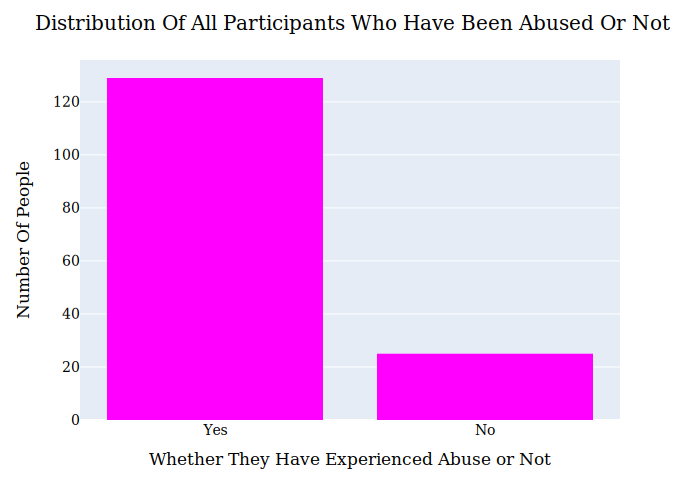

In [152]:
abuseDistribution(activeParticipants, title = "Distribution Of All Participants Who Have Been Abused Or Not")

In [153]:
activeParticipants["Have you experienced any form of abuse (neglect, emotional, sexual, psychological, physical, etc)?"].value_counts()/activeParticipants.shape[0]*100

Yes    83.225806
No     16.129032
Name: Have you experienced any form of abuse (neglect, emotional, sexual, psychological, physical, etc)?, dtype: float64

129 people, or 83.2% of people, suffered some sort of abuse. 25 people (or 16.1% of people) have not. There is no data on what type of abuse they have suffered.

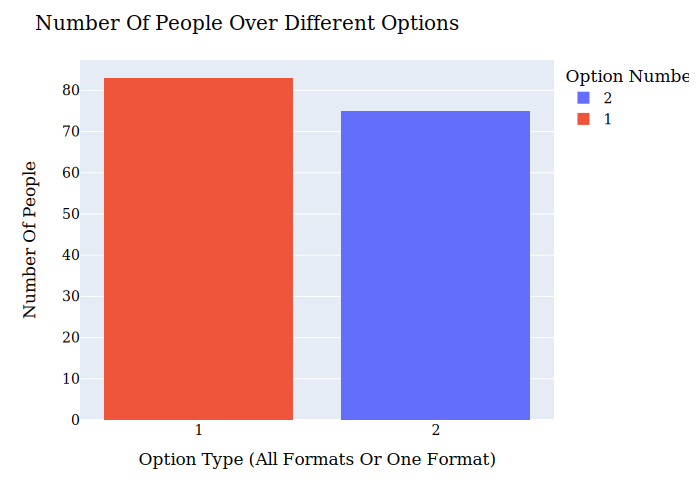

In [154]:
fig = px.histogram(
    participantsdf2,
    x = "Option Number",
    color = "Option Number"
#     y = "weightedMean"
)
# Bar graph descending order
fig.update_layout(
    barmode='stack', xaxis={'categoryorder':'total descending'},
    title="Number Of People Over Different Options",
    xaxis_title= "Option Type (All Formats Or One Format)",
    yaxis_title= "Number Of People",
    font=dict(
        family="Georgia",
        size=14,
#         color="#7f7f7f"
        color = "black"
    )
)
fig.update_xaxes(type='category')
# fig.show()
fig.show(renderer="svg")

In [155]:
# participantsdf2["Option Number"].unique()
participantsdf2["Option Number"].value_counts()/participantsdf2["Option Number"].shape * 100

1    52.531646
2    47.468354
Name: Option Number, dtype: float64

83 people (52.53% of people)chose the Option 1, or chose to see only 1 media story type.

75 people (47.47% of people) chose Option 2, which is viewing all 4 media story types.

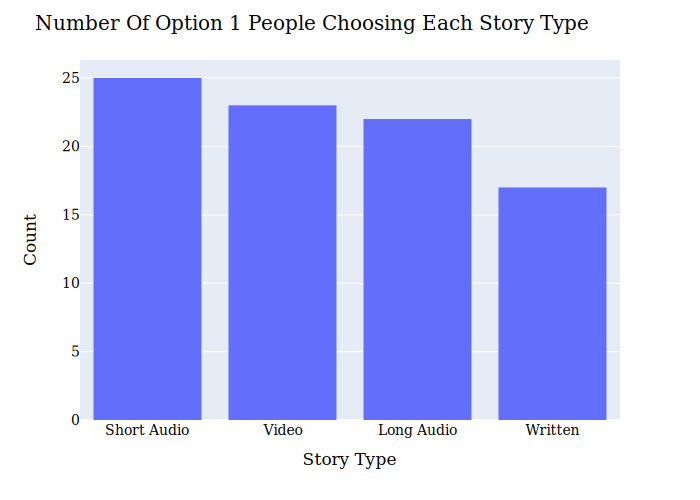

In [156]:
fig = px.histogram(
    participantsdf[participantsdf["Story Type"] != "All"],
    x = "Story Type",
#     y = "weightedMean"
)
# Bar graph descending order
fig.update_layout(
    barmode='stack', xaxis={'categoryorder':'total descending'},
    title="Number Of Option 1 People Choosing Each Story Type",
    xaxis_title= "Story Type",
    yaxis_title= "Count",
    font=dict(
        family="Georgia",
        size=14,
#         color="#7f7f7f"
        color = "black"
    )
)

fig.show(renderer = "svg")

In [157]:
 participantsdf[participantsdf["Story Type"] != "All"]["Story Type"].value_counts()/participantsdf.shape[0]*100

Short Audio    13.368984
Video          12.299465
Long Audio     11.764706
Written         9.090909
Name: Story Type, dtype: float64

Of all the people who chose to view only 1 story media (and actually finished the research), short audio is the most popular choice (25 people, or 13.4% of people).

Next, 23 people (or 12.3% of people) chose video.

Next, 22 people (or 11.8% of people) chose long audio (audio about 5 minutes long)

Next, 17 pepole (or 9.1% of people) chose written transcript.

All in all, the distribution of the different media types of option 1 people is relatively spread out evenly. 

#### Demographics For Group 1 People

Demographics for humans who chose Option 1 (Chose the option to see only 1 story media type).

In [158]:
group1 = activeParticipants[activeParticipants["Option Number"] == 1]
group2 = activeParticipants[activeParticipants["Option Number"] == 2]
print(group1.shape)
print(group2.shape)

(80, 28)
(75, 28)


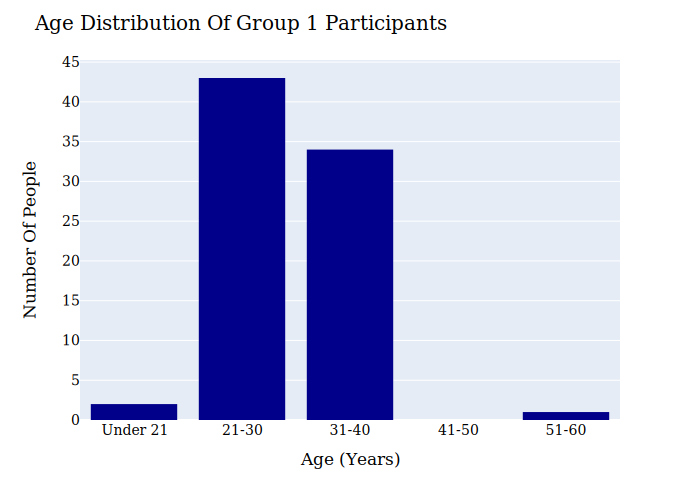

In [159]:
ageDistribution(group1, title = "Age Distribution Of Group 1 Participants")

In [160]:
group1["Age (years)"].value_counts()/group1.shape[0]*100

21-30       53.75
31-40       42.50
Under 21     2.50
51-60        1.25
Name: Age (years), dtype: float64

The most popular age group for Group 1 people are those who are 21-30 years old (43 people, or 53.8% of people) and 31-40 years old (34 people, or 42.5% of people). Only 2 people (or 2.5% of people) were under 21 years old, and 1 person (or 1.25% of people) was 51-60 years old.

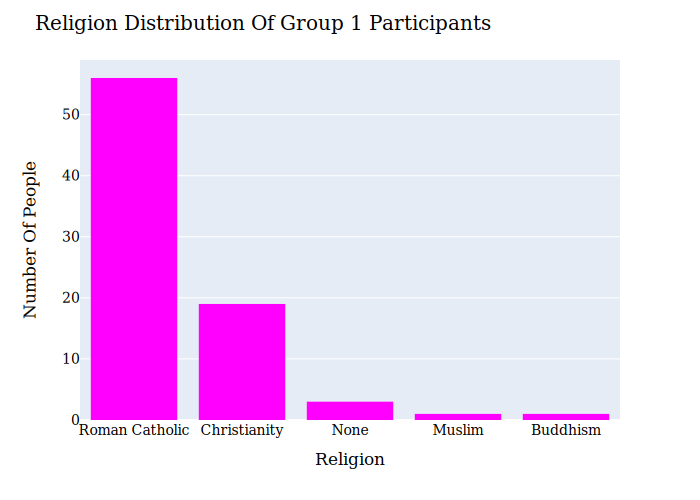

In [161]:
religionDistribution(group1, title = "Religion Distribution Of Group 1 Participants")

In [162]:
group1["Indicate your religious affiliation - Selected Choice"].value_counts()/group1.shape[0]*100

Roman Catholic    70.00
Christianity      23.75
None               3.75
Buddhism           1.25
Muslim             1.25
Name: Indicate your religious affiliation - Selected Choice, dtype: float64

Of the group 1 participants, the most popular religious group was Roman Catholic (56 people people, 70% of people). 19 people (or 23.8% of people) were Christian. 1 person (1.25% of people) was Muslim, and 1 person (1.25% of people) was Buddhist. 3 people (3.75% of people) did not have a religion.

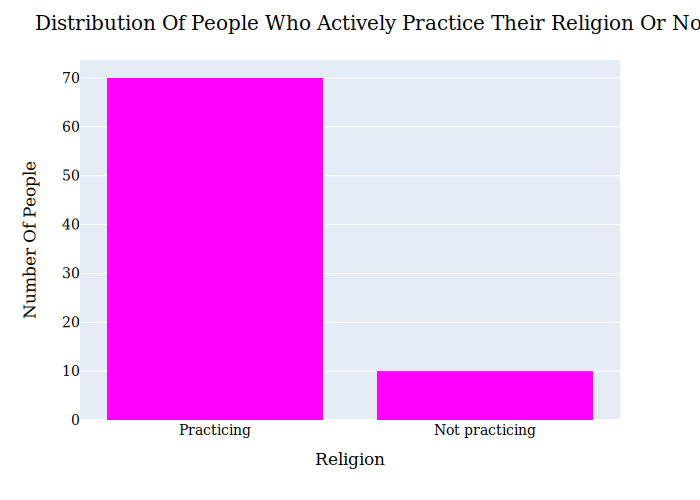

In [163]:
practicingDistribution(group1, title = "Distribution Of People Who Actively Practice Their Religion Or Not")

In [164]:
group1['Are you practicing or not practicing?'].value_counts()/group1.shape[0]*100

Practicing        87.5
Not practicing    12.5
Name: Are you practicing or not practicing?, dtype: float64

Of people from group 1, 70 participants (87.5% of people) actively practice their religion; 10 people (12.5% of people) do not.

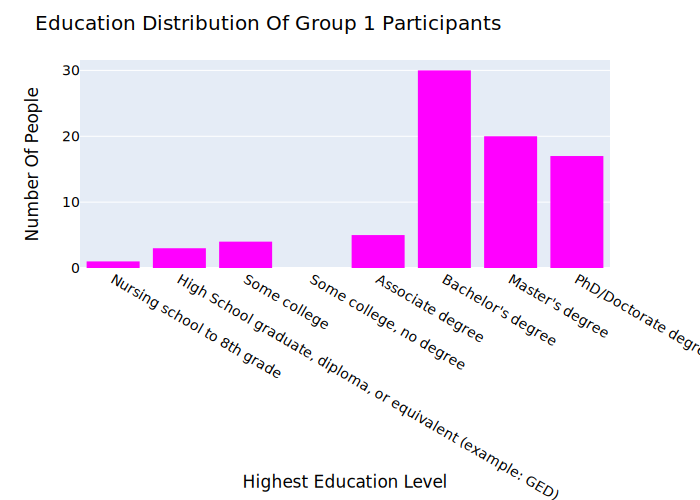

In [165]:
educationDistribution(group1, title = "Education Distribution Of Group 1 Participants")

In [166]:
group1['What is your highest level of education?'].value_counts()/group1.shape[0]*100

Bachelor's degree                                              37.50
Master's degree                                                25.00
PhD/Doctorate degree                                           21.25
Associate degree                                                6.25
Some college                                                    5.00
High School graduate, diploma, or equivalent (example: GED)     3.75
Nursing school to 8th grade                                     1.25
Name: What is your highest level of education?, dtype: float64

Of the people who were in Group 1,

30 people (or 37.5% of people) had Bachelor's, 20 people (or 25% of people) had Masters, 17 pepole (or 21.3% of people) had PhD/Doctorate degrees.

5 people (or 6.25% of people) achieved Associate degree, 4 people (or 5% of people) went to some college, 3 people (or 3.75% of people) had only a high school diploma, and 1 person (or 1.25% of people) went up to grade 8.

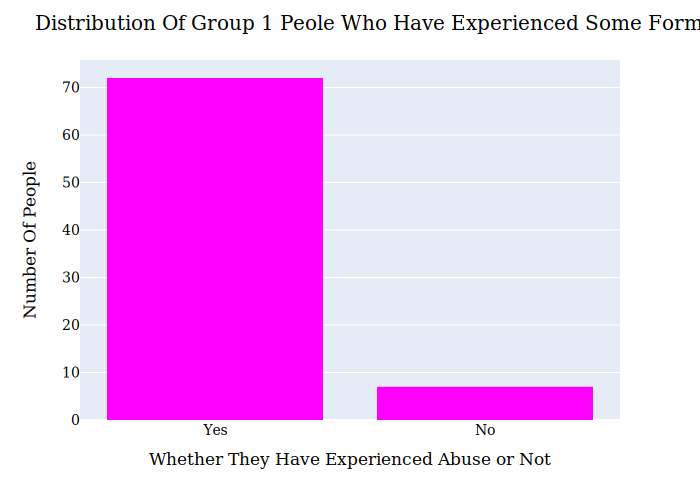

In [167]:
abuseDistribution(group1, title = "Distribution Of Group 1 Peole Who Have Experienced Some Form Of Abuse")

In [168]:
group1['Have you experienced any form of abuse (neglect, emotional, sexual, psychological, physical, etc)?'].value_counts()/group1.shape[0]*100

Yes    90.00
No      8.75
Name: Have you experienced any form of abuse (neglect, emotional, sexual, psychological, physical, etc)?, dtype: float64

Of the group 1 people, 72 people (90% of people) have experienced some form of abuse. 7 people (8.8% of people) have not.

## Demographics For Group 2 Participants

These demographics are from the people who chose Option 2, or the option to view all 4 story media types. Media types: short audio (1.5 mins), long audio (5 mins), video, written transcript.

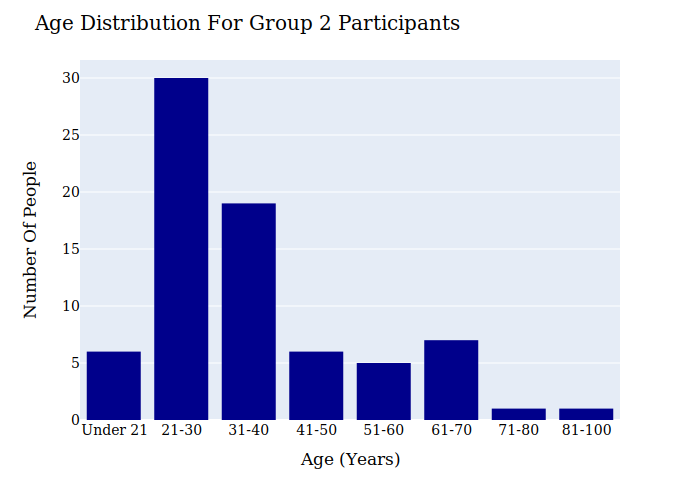

In [169]:
ageDistribution(group2, title = "Age Distribution For Group 2 Participants")

In [170]:
group2["Age (years)"].value_counts()/group2.shape[0]*100

21-30       40.000000
31-40       25.333333
61-70        9.333333
41-50        8.000000
Under 21     8.000000
51-60        6.666667
81-100       1.333333
71-80        1.333333
Name: Age (years), dtype: float64

Of the group 2 people, 30 people (or 40% of people) are 21-30 years old. 19 people (25.3% of people) are 31-40 years. 7 people (9.3% of people) are bewteen 61-70 years. 6 people (8% of people) are 41-50. 6 people (8% of peopple) are under 21 years old. 5 people (6.7% of people) are 51-60. 1 person (1.3% of people) is 71-80. 1 person (1.3% of people) is 81-100.

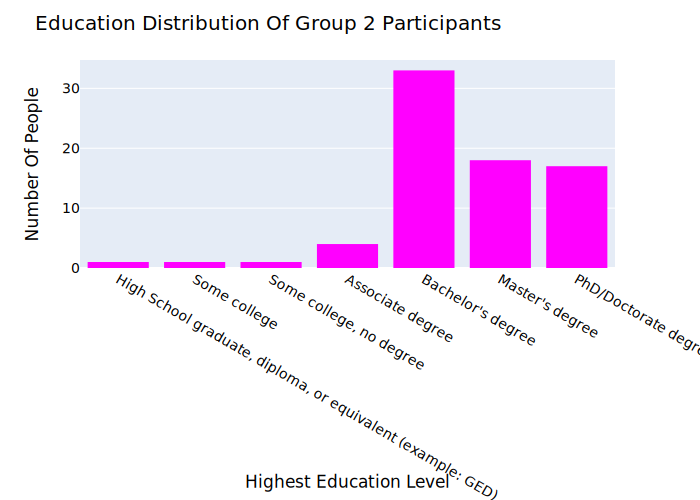

In [171]:
educationDistribution(group2, title = "Education Distribution Of Group 2 Participants")

In [172]:
group2['What is your highest level of education?'].value_counts()/group2.shape[0]*100

Bachelor's degree                                              44.000000
Master's degree                                                24.000000
PhD/Doctorate degree                                           22.666667
Associate degree                                                5.333333
High School graduate, diploma, or equivalent (example: GED)     1.333333
Some college, no degree                                         1.333333
Some college                                                    1.333333
Name: What is your highest level of education?, dtype: float64

Of the people in Group 2, 33 people (44% of people) obtained a Bachelor's degree. 18 people (24% of people) received a Master's, 17 people (or 22.7% of people) received a PhD.

4 people (5.3% of people) received an Associate degree, 2 people (or 2.6% of people) went to some college, 1 person (or 1.3% of people) received a high school diploma or GED.

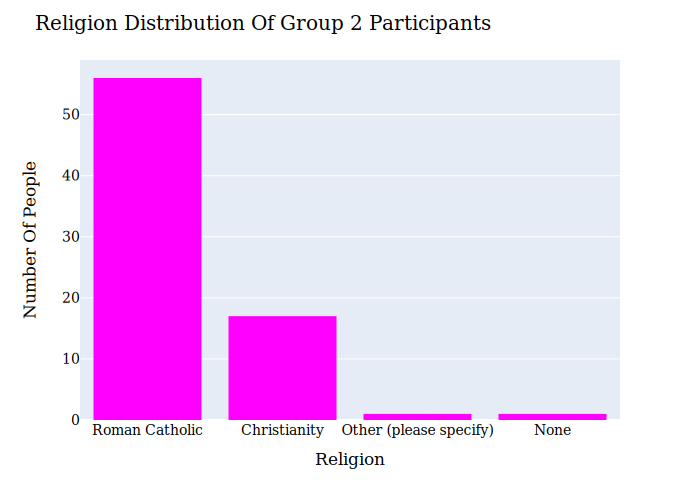

In [173]:
religionDistribution(group2, title = "Religion Distribution Of Group 2 Participants")

Among the Group 2 people, 56 people were Roman Catholic. 17 were Christian. 1 other person had a different religion, and 1 person was not religious.

Roman Catholic was the most popular religion. Christians made up a small portion of the group 2 people.

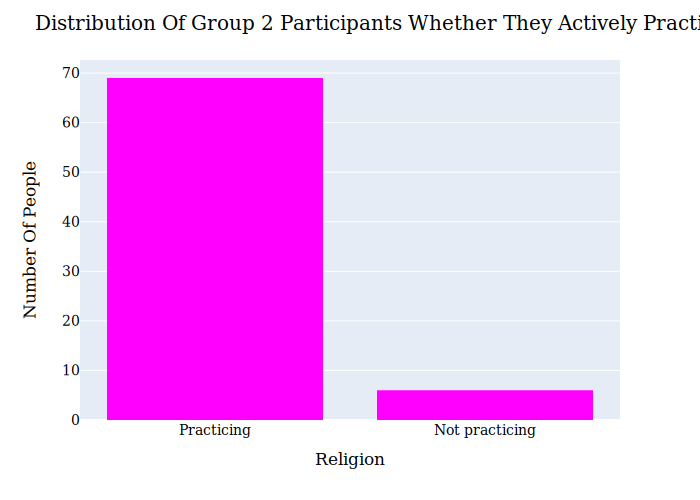

In [174]:
practicingDistribution(group2, title = "Distribution Of Group 2 Participants Whether They Actively Practice Or Not")

In [175]:
group2['Are you practicing or not practicing?'].value_counts()/group2.shape[0]*100

Practicing        92.0
Not practicing     8.0
Name: Are you practicing or not practicing?, dtype: float64

For the group 2 people, 69 people (92% of people) actively practice their religion. 6 people (or 8% of people) did not.

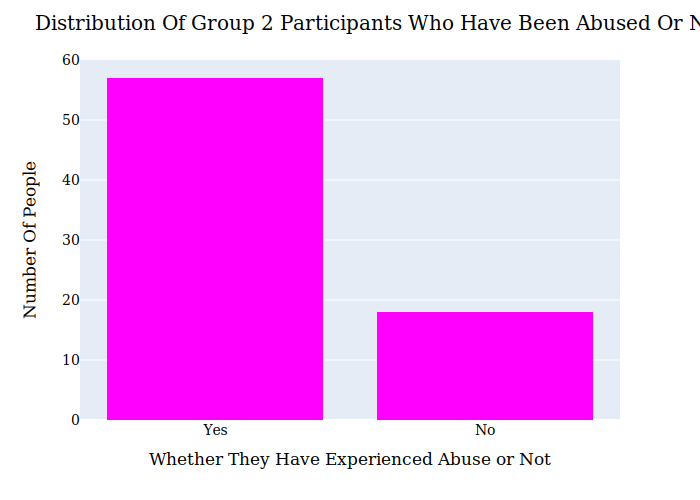

In [176]:
abuseDistribution(group2, title = "Distribution Of Group 2 Participants Who Have Been Abused Or Not")

In [177]:
group2['Have you experienced any form of abuse (neglect, emotional, sexual, psychological, physical, etc)?'].value_counts()/group2.shape[0]*100

Yes    76.0
No     24.0
Name: Have you experienced any form of abuse (neglect, emotional, sexual, psychological, physical, etc)?, dtype: float64

Among group 2 participants, 57 people (76% of people) have experienced some form of abuse. 18 people (24% of people) have not.

## Demographics Of Specific Group 1 Participants

We will look at demographics of the group 1 participants. Group 1 participants had to choose 1 of 4 story media types: short audio, long audio, written, video. We are subdividing the group 1 participants into their respective groups.

In [178]:
# group2[group2["Story Type"] ]
# group1["Story Type"].unique()
shortAudio = group1[group1["Story Type"] == "Short Audio"]
longAudio = group1[group1["Story Type"] == "Long Audio"]
video = group1[group1["Story Type"] == "Video"]
written = group1[group1["Story Type"] == "Written"]


### Short Audio

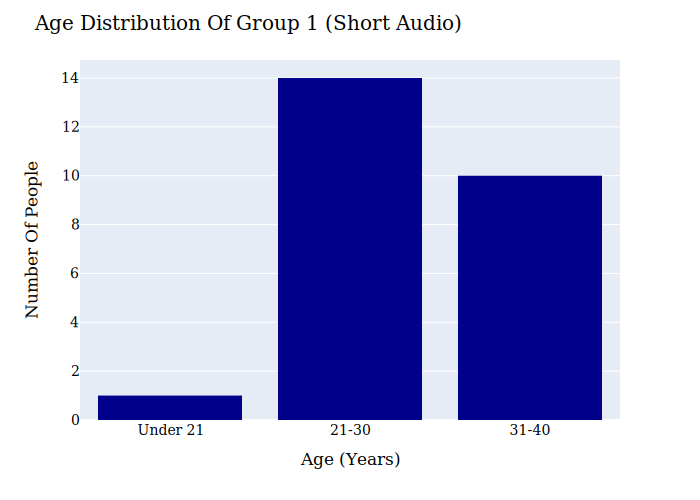

In [179]:
ageDistribution(shortAudio, title = "Age Distribution Of Group 1 (Short Audio)")

In [180]:
shortAudio["Age (years)"].value_counts()/shortAudio.shape[0]*100

21-30       56.0
31-40       40.0
Under 21     4.0
Name: Age (years), dtype: float64

Of the group 1 people who viewed short audio, 

14 people (56% of people) were betrween 21 and 30 years old. 10 people (or 40% of people) were 31-40 years old. 1 person (or 4% of people) was under 21. There were no elderly people or anybody above 40 years old.

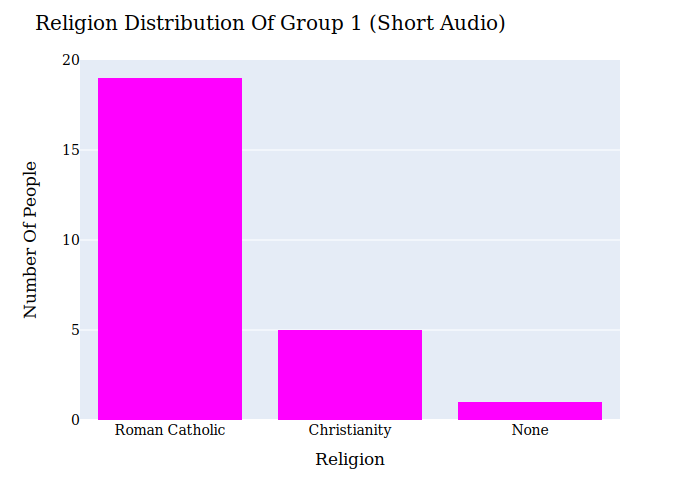

In [181]:
religionDistribution(shortAudio, title = "Religion Distribution Of Group 1 (Short Audio)")

In [182]:
shortAudio['Indicate your religious affiliation - Selected Choice'].value_counts()/shortAudio.shape[0]*100

Roman Catholic    76.0
Christianity      20.0
None               4.0
Name: Indicate your religious affiliation - Selected Choice, dtype: float64

Of the short audio group 1 people, 

19 people (76% of people) are Roman Catholic. 5 people (20% of people) are Christians. 1 person (4% of people) was not religious.

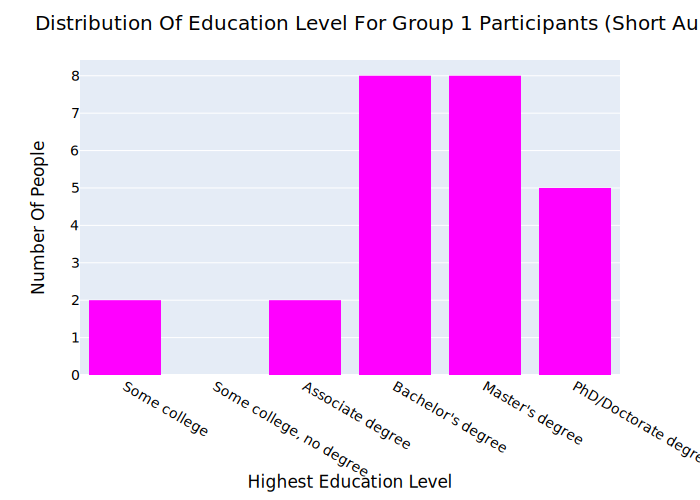

In [183]:
educationDistribution(shortAudio, title = "Distribution Of Education Level For Group 1 Participants (Short Audio)")

In [184]:
shortAudio['What is your highest level of education?'].value_counts()/shortAudio.shape[0]*100

Bachelor's degree       32.0
Master's degree         32.0
PhD/Doctorate degree    20.0
Associate degree         8.0
Some college             8.0
Name: What is your highest level of education?, dtype: float64

Of the group 1 people who viewed a short audio, 

8 people (32% of people) obtained a bachelor's degree, 8 people (32% of people) obtained a Master's, and 5 people (20% of people) obtained a PhD. 2 people (or 8% of people) received an Associate, and 2 people (8% of people) went to some college. 

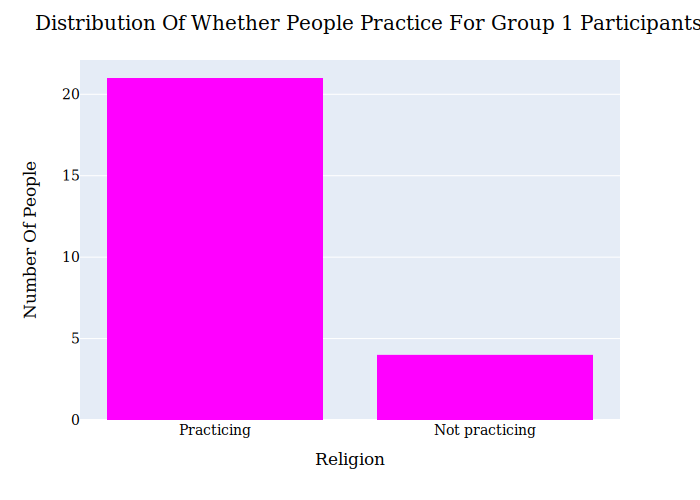

In [185]:
practicingDistribution(shortAudio, title = "Distribution Of Whether People Practice For Group 1 Participants (Short Audio)")

In [186]:
shortAudio[  'Are you practicing or not practicing?'].value_counts()/shortAudio.shape[0]*100

Practicing        84.0
Not practicing    16.0
Name: Are you practicing or not practicing?, dtype: float64

Of the group 1 short audio people, 

21 people (84% of people) are actively practicing their religion. 4 people (16% of people) do not.

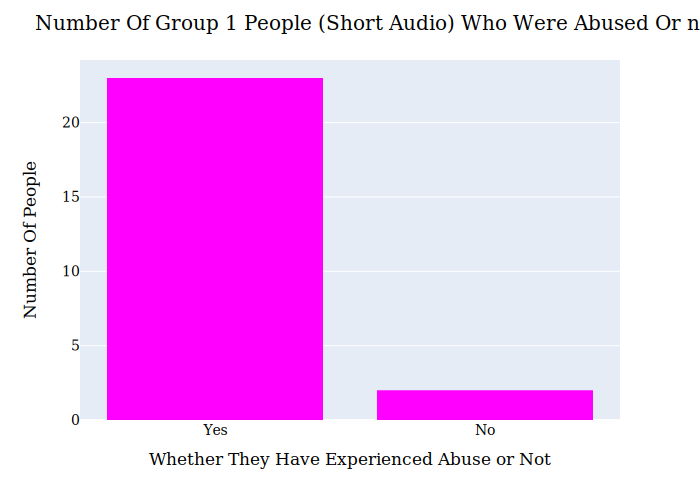

In [187]:
abuseDistribution(shortAudio, title = "Number Of Group 1 People (Short Audio) Who Were Abused Or not")

In [188]:
shortAudio['Have you experienced any form of abuse (neglect, emotional, sexual, psychological, physical, etc)?'].value_counts()/shortAudio.shape[0]*100

Yes    92.0
No      8.0
Name: Have you experienced any form of abuse (neglect, emotional, sexual, psychological, physical, etc)?, dtype: float64

Of the group 1 short audio people, 23 people (92% of people) have been abused. 2 people (8% of people) did not. 

### Long Audio

This long audio is about 5 minutes.

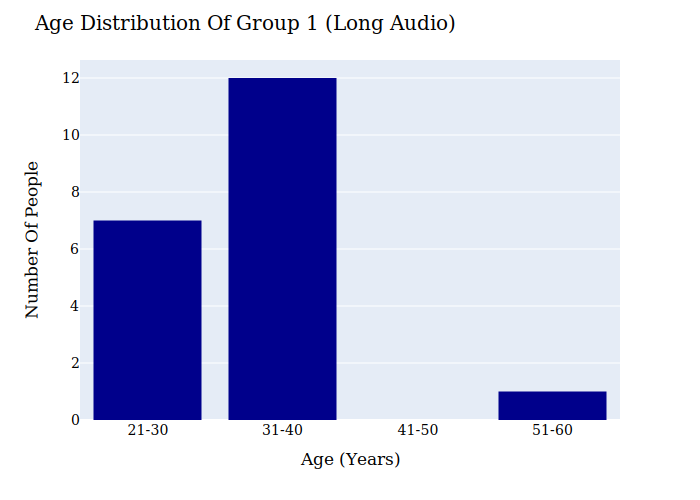

31-40    60.0
21-30    35.0
51-60     5.0
Name: Age (years), dtype: float64


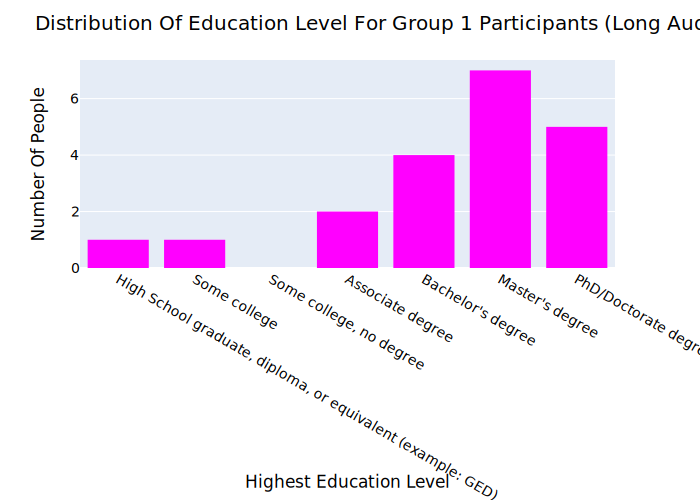

Master's degree                                                35.0
PhD/Doctorate degree                                           25.0
Bachelor's degree                                              20.0
Associate degree                                               10.0
High School graduate, diploma, or equivalent (example: GED)     5.0
Some college                                                    5.0
Name: What is your highest level of education?, dtype: float64


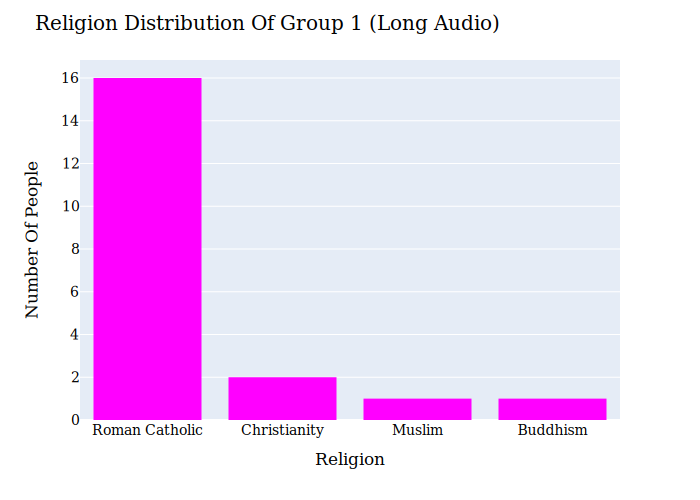

Roman Catholic    80.0
Christianity      10.0
Buddhism           5.0
Muslim             5.0
Name: Indicate your religious affiliation - Selected Choice, dtype: float64


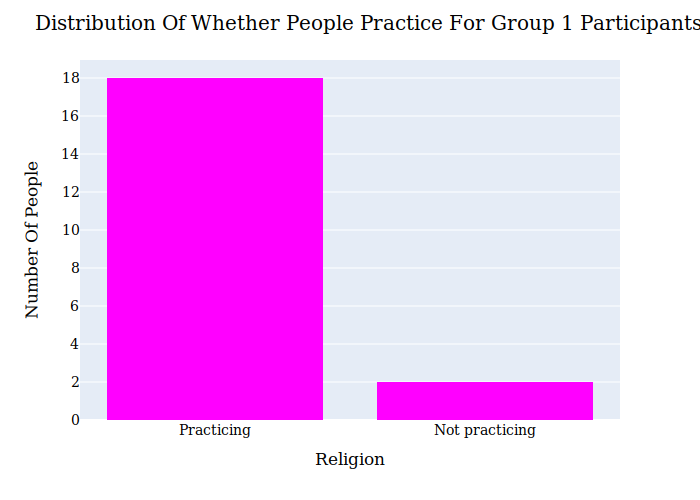

Practicing        90.0
Not practicing    10.0
Name: Are you practicing or not practicing?, dtype: float64


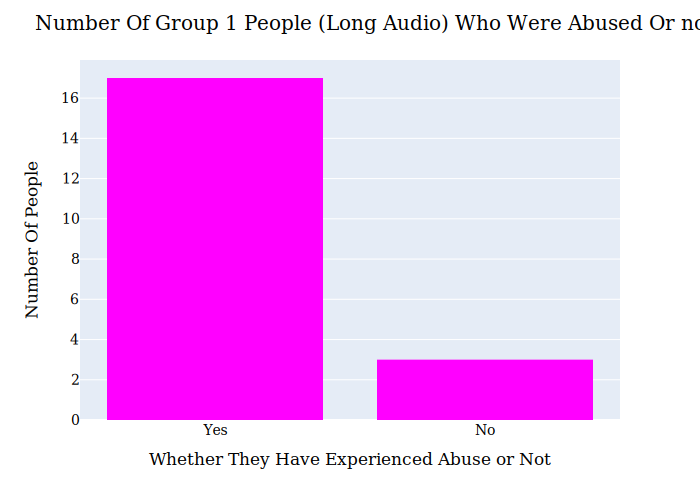

Yes    85.0
No     15.0
Name: Have you experienced any form of abuse (neglect, emotional, sexual, psychological, physical, etc)?, dtype: float64


In [189]:
ageDistribution(longAudio, title = "Age Distribution Of Group 1 (Long Audio)")
print(longAudio["Age (years)"].value_counts()/longAudio.shape[0]*100)

educationDistribution(longAudio, title = "Distribution Of Education Level For Group 1 Participants (Long Audio)")
print(longAudio['What is your highest level of education?'].value_counts()/longAudio.shape[0]*100)

religionDistribution(longAudio, title = "Religion Distribution Of Group 1 (Long Audio)")
print(longAudio['Indicate your religious affiliation - Selected Choice'].value_counts()/longAudio.shape[0]*100)

practicingDistribution(longAudio, title = "Distribution Of Whether People Practice For Group 1 Participants (Long Audio)")
print(longAudio['Are you practicing or not practicing?'].value_counts()/longAudio.shape[0]*100)

abuseDistribution(longAudio, title = "Number Of Group 1 People (Long Audio) Who Were Abused Or not")
print(longAudio['Have you experienced any form of abuse (neglect, emotional, sexual, psychological, physical, etc)?'].value_counts()/longAudio.shape[0]*100)

Among the group 1 people who listened to the long audio (5 mins),

12 people (or 60% of people) were 31-40 years old. 7 people (or 35% of people) were 21-30 year olds. 1 person (or 5% of people) was 51-60 years old.

For education: 4 people (or 20% of people) obtained Bachetlor's Degree, 7 people (or 35% of people) obtained a Master's Degree, 5 people (or 25% of people) obtained a PhD/Doctorate degree. 2 people (10% of people) got an Associate degree, 2 people (or 5% of people) attended some college.

For religion: 16 people were Roman Catholic (80% of people). 2 people (10% of people) were Christians. 1 person (5%) was Muslim, 1 person (5% of people) was Buddhist.

For actively practicing religion: 18 people (90%) were actively practicing. 2 people (10%) did not actively practice.

For whether they have been abused: 17 people (85%) have experienced any form of abuse. 3 (15%) of them have never been abused. Vast majority of people have experienced some form of abuse.

### Video

Demographics for the group 1 people who viewed just a video. Video was about 5 minutes long.


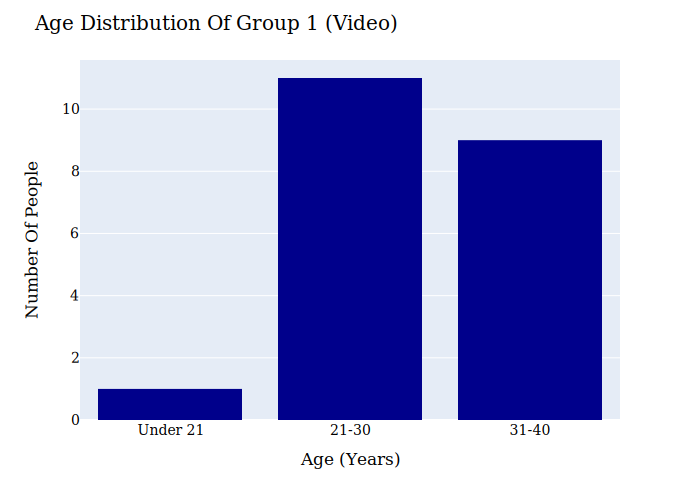

21-30       52.380952
31-40       42.857143
Under 21     4.761905
Name: Age (years), dtype: float64


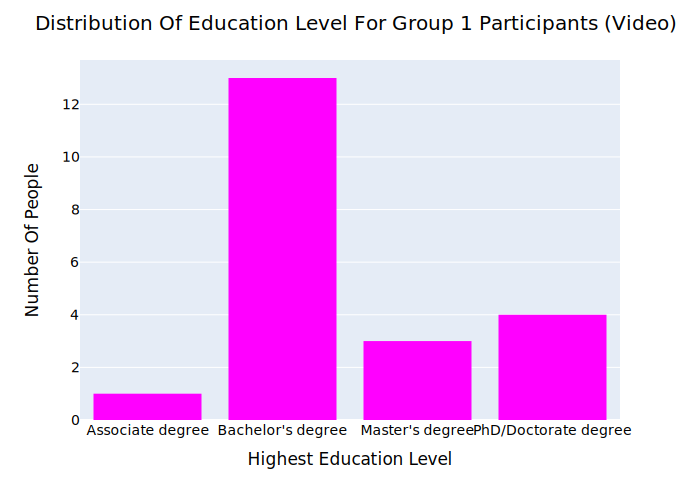

Bachelor's degree       61.904762
PhD/Doctorate degree    19.047619
Master's degree         14.285714
Associate degree         4.761905
Name: What is your highest level of education?, dtype: float64


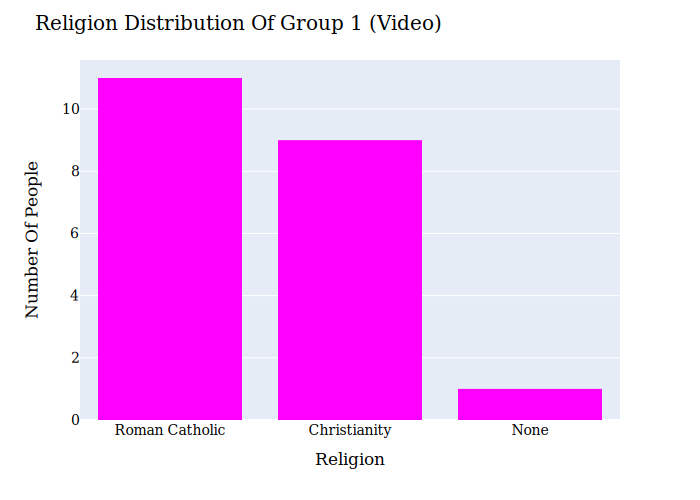

Roman Catholic    52.380952
Christianity      42.857143
None               4.761905
Name: Indicate your religious affiliation - Selected Choice, dtype: float64


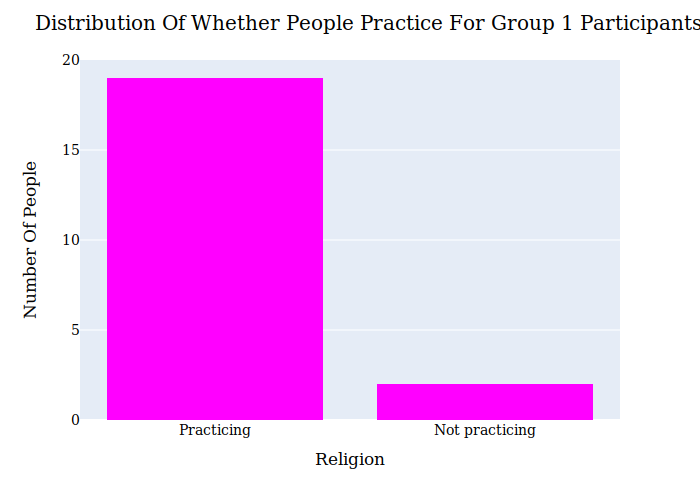

Practicing        90.47619
Not practicing     9.52381
Name: Are you practicing or not practicing?, dtype: float64


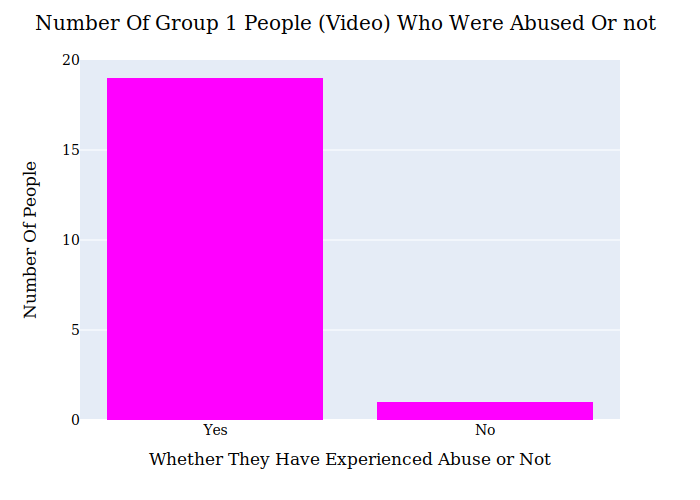

Yes    90.476190
No      4.761905
Name: Have you experienced any form of abuse (neglect, emotional, sexual, psychological, physical, etc)?, dtype: float64


In [190]:
ageDistribution(video, title = "Age Distribution Of Group 1 (Video)")
print(video["Age (years)"].value_counts()/video.shape[0]*100)

educationDistribution(video, title = "Distribution Of Education Level For Group 1 Participants (Video)")
print(video['What is your highest level of education?'].value_counts()/video.shape[0]*100)

religionDistribution(video, title = "Religion Distribution Of Group 1 (Video)")
print(video['Indicate your religious affiliation - Selected Choice'].value_counts()/video.shape[0]*100)

practicingDistribution(video, title = "Distribution Of Whether People Practice For Group 1 Participants (Video)")
print(video['Are you practicing or not practicing?'].value_counts()/video.shape[0]*100)

abuseDistribution(video, title = "Number Of Group 1 People (Video) Who Were Abused Or not")
print(video['Have you experienced any form of abuse (neglect, emotional, sexual, psychological, physical, etc)?'].value_counts()/video.shape[0]*100)

For the people who have viewed just the video,

For age distribution: 1 person (4.8%) was under 21, 11 people (52.4%) were 21-30 years old, 9 people (42.9%) were 31-40 years old.

For education distribution: 1 person (4.8%) received an Associate degree, 13 pepole (61.9%) got Bachelor's, 3 people (14.3%) obtained a Master's, and 4 people (19%) obtained a PhD/Doctorate degree. Bachelor's degree was the most popular highest education level. There was no one who received less than an Associate degree for this video group.

For religion, 11 people (52.4%) were Roman Catholic, 9 people (42.9%) were Christian, and 1 person (4.8%) was not religious. This time, surprisingly, there were about an equal representation of Roman Catholics and Christians.

For religious practicing, 19 people (90.5%) were actively practicing; 2 people (9.5%) were not.

For history of abuse, 19 people (90.5%) have been abused before; 1 person (4.8%) had not. 1 person did not comment (4.8%).

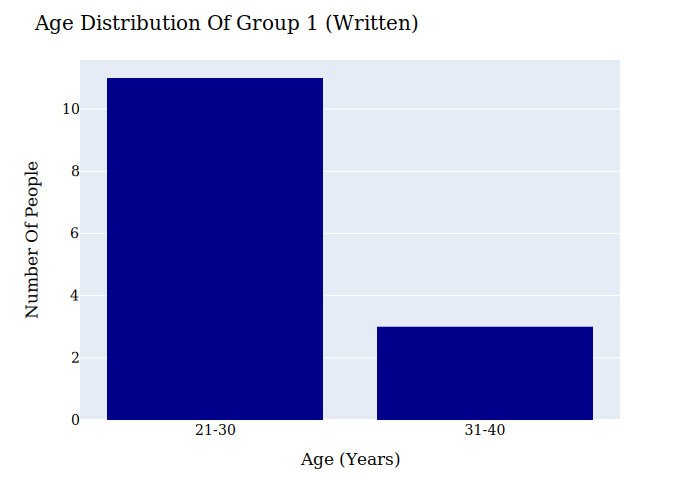

21-30    78.571429
31-40    21.428571
Name: Age (years), dtype: float64


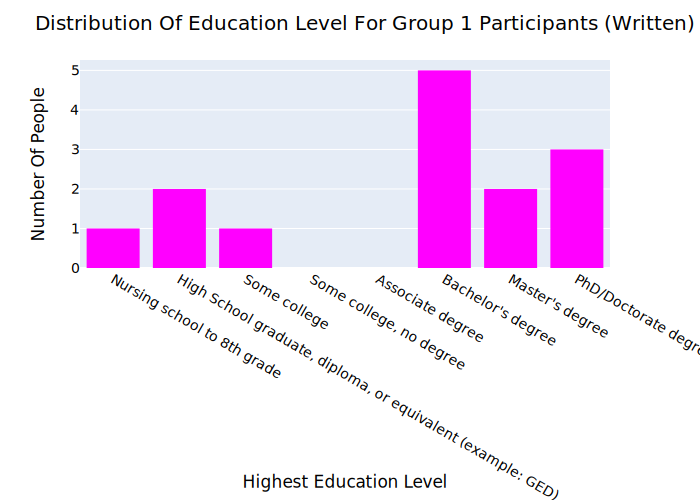

Bachelor's degree                                              35.714286
PhD/Doctorate degree                                           21.428571
High School graduate, diploma, or equivalent (example: GED)    14.285714
Master's degree                                                14.285714
Nursing school to 8th grade                                     7.142857
Some college                                                    7.142857
Name: What is your highest level of education?, dtype: float64


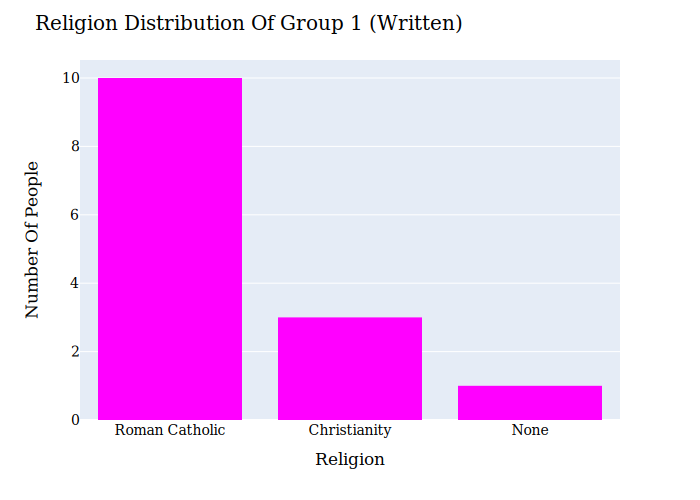

Roman Catholic    71.428571
Christianity      21.428571
None               7.142857
Name: Indicate your religious affiliation - Selected Choice, dtype: float64


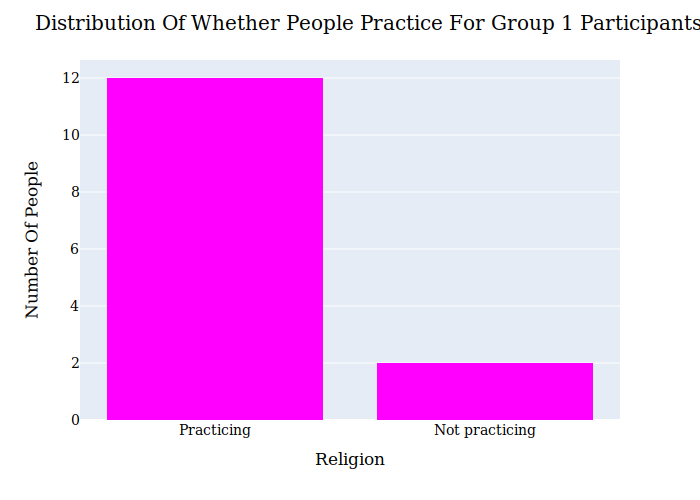

Practicing        85.714286
Not practicing    14.285714
Name: Are you practicing or not practicing?, dtype: float64


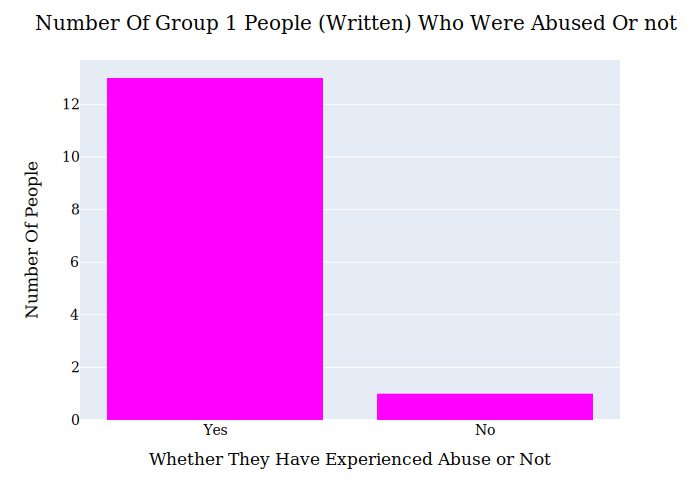

Yes    92.857143
No      7.142857
Name: Have you experienced any form of abuse (neglect, emotional, sexual, psychological, physical, etc)?, dtype: float64


In [191]:
ageDistribution(written, title = "Age Distribution Of Group 1 (Written)")
print(written["Age (years)"].value_counts()/written.shape[0]*100)

educationDistribution(written, title = "Distribution Of Education Level For Group 1 Participants (Written)")
print(written['What is your highest level of education?'].value_counts()/written.shape[0]*100)

religionDistribution(written, title = "Religion Distribution Of Group 1 (Written)")
print(written['Indicate your religious affiliation - Selected Choice'].value_counts()/written.shape[0]*100)

practicingDistribution(written, title = "Distribution Of Whether People Practice For Group 1 Participants (Written)")
print(written['Are you practicing or not practicing?'].value_counts()/written.shape[0]*100)

abuseDistribution(written, title = "Number Of Group 1 People (Written) Who Were Abused Or not")
print(written['Have you experienced any form of abuse (neglect, emotional, sexual, psychological, physical, etc)?'].value_counts()/written.shape[0]*100)

For people who read a written transcript,

For age distribution, 11 people (78.6%) were 21-30 years old; 3 people (21.4%) were 31-40 years old. There was no one older than 40 (no elders).

For education distribution, 5 people (35.7%) obtained a Bachelor's degree. 2 people (14.3%) got a Master's. 3 people (21.4%) got a PhD/Doctorate degree. 1 (7.1%) person went to some college; 2 people (14.3%) completed just to high school; 1 person (7.1%) went as high as grade 8.

For religion, 10 people (71.3%) were Roman Catholic, 3 (21.4%) were Christian, and 1 (7.1%) was not religious.

For religious practicing, 12 people (85.7%) were actively practicing; 2 people (14.3%) were not.

For abuse history, 13 people (92.9%) have experienced some form of abuse; 1 person (7.1%) was never abused.

## Data Analysis: Before And After

We will look into how the test participants felt before and after the stories.

The questions are a part of one of the categories:

1. Quality of Life scores, pre/post, overall, option one two
2. Institutional  Betrayal,  " " "....
3. spiritual well being
4. image of god
5. moral injury
6. religious coping
7. religiosity?
8. effectiveness-meaningfulness, etc... 

In [192]:
# TODO: spawn a dictionary of question numbers and their category


# lifeQuality = "lifeQuality"

categoryDict = {
    1: "moralInjury", # reverse
    2: "moralInjury", # reverse
    3: "moralInjury", # reverese
    4: "moralInjury", # reverse
    5: "religiousCoping", # presence of divine
    6: "religiousCoping",
    7: "religiousCoping",
    8: "religiousCoping",
    9: "religiousCoping", # please reverse
    10: "religiousCoping",
    
    11: "religiousCoping",
    12: "religiousCoping",
    13: "religiousCoping", # reverse
    14: "religiousCoping", # reverse
    
    
    15: "spiritualWellBeing",
    16: "spiritualWellBeing",
    17: "spiritualWellBeing", #reverse
    18: "spiritualWellBeing", 
    19: "spiritualWellBeing" ,# reverse
    
    20: "spiritualWellBeing", 
    21: "spiritualWellBeing",
    22: "spiritualWellBeing",
    23: "spiritualWellBeing", # reverse
    24: "spiritualWellBeing", 
    25: "spiritualWellBeing",
    26: "spiritualWellBeing",
    27: "spiritualWellBeing",
    28: "spiritualWellBeing",
    29: "spiritualWellBeing", #reverse
    30: "spiritualWellBeing", # reverse
    31: "spiritualWellBeing",
    32: "spiritualWellBeing", # outside pressure to accept beliefs I don't believe it... # reverse
    33: "spiritualWellBeing",
    
    34: "moralInjury", # trusting people
    35: "moralInjury", # reverse
    36: "moralInjury", # r
    37: "moralInjury", # rever
    38: "moralInjury", # rever
    39: "moralInjury", # rever
    
    40: "moralInjury", #reverese
    41: "moralInjury", # reverse
    42: "moralInjury", # rev
    43: "moralInjury", # reverse
    44: "moralInjury", # rev
    45: "moralInjury", 
    46: "moralInjury", 
    47: "moralInjury", # reverse
    48: "spiritualWellBeing",
    49: "spiritualWellBeing",
    50: "spiritualWellBeing",
    51: "spiritualWellBeing",
    52: "spiritualWellBeing",
    53: "spiritualWellBeing",
    54: "spiritualWellBeing",
    
    55: "religiousCoping", # Durel
    56: "religiousCoping", #  Durel
    
    57: "moralInjury", # reverse
    58: "moralInjury", 
    59: "moralInjury",
    
    60: "moralInjury",
    61: "institutionalBetrayal",
    62: "institutionalBetrayal",
    63: "institutionalBetrayal",
    64: "institutionalBetrayal",
    65: "institutionalBetrayal",
    66: "institutionalBetrayal",
    67: "institutionalBetrayal",
    68: "institutionalBetrayal",
    69: "institutionalBetrayal",
    
    70: "institutionalBetrayal",
    71: "institutionalBetrayal",
    72: "institutionalBetrayal",
    73: "institutionalBetrayal",
    74: "institutionalBetrayal",
    
    
}



In [193]:
categoryQuestiondf = pd.DataFrame(categoryDict.items(), columns=['QuestionNumber', 'Category'])
categoryQuestiondf.head()

,QuestionNumber,Category
0,1,moralInjury
1,2,moralInjury
2,3,moralInjury
3,4,moralInjury
4,5,religiousCoping


In [194]:
questionNumberToReverse = [1, 2, 3, 4, 9, 13, 14, 17, 19, 23, 29, 30, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 57]

columnsToReverse = [f"q{value}" for i, value in enumerate(questionNumberToReverse)]

In [195]:
# (
#     categoryQuestiondf >>
#     mutate(toReverse = )
# )
categoryQuestiondf["toReverse"] = categoryQuestiondf["QuestionNumber"].apply(lambda row: 1 if row in questionNumberToReverse else 0)
categoryQuestiondf["ColumnName"] = categoryQuestiondf["QuestionNumber"].apply(lambda row: f"q{row}")
categoryQuestiondf.head()

,QuestionNumber,Category,toReverse,ColumnName
0,1,moralInjury,1,q1
1,2,moralInjury,1,q2
2,3,moralInjury,1,q3
3,4,moralInjury,1,q4
4,5,religiousCoping,0,q5


In [196]:
fileName = "Pre_Survey.xlsx"
preSurvey = pd.read_excel(fileName)
print(preSurvey.shape)

(176, 83)


In [197]:
preSurvey.head()

,Please input the ID # Justine gave you. Only she has access to which ID number corresponds to which respondent.,Click on the circle to indicate your age. - Age,Select the circle to indicate ethnicity. - Ethnicity,Select the option to indicate your gender. - Selected Choice,Select the option to indicate your gender. - Other - Text,Select the circle to indicate your highest level of education. - Highest level of education,Directions: Please select a number between 1 and 10 that describes how true_x000D_\neach statement is for you (1 = â€œabsolutely untrueâ€ to 10 = â€œabsolutely trueâ€) - 1. I understand my lifeâ€™s meaning.,Directions: Please select a number between 1 and 10 that describes how true_x000D_\neach statement is for you (1 = â€œabsolutely untrueâ€ to 10 = â€œabsolutely trueâ€) - 2. My life has a clear sense of purpose.,Directions: Please select a number between 1 and 10 that describes how true_x000D_\neach statement is for you (1 = â€œabsolutely untrueâ€ to 10 = â€œabsolutely trueâ€) - 3. I have a good sense of what makes my life meaningful.,Directions: Please select a number between 1 and 10 that describes how true_x000D_\neach statement is for you (1 = â€œabsolutely untrueâ€ to 10 = â€œabsolutely trueâ€) - 4. I have discovered a satisfying life purpose.,...,"This section will ask you to think about larger institutions to which you belong or have\nbelonged, which may or may not call to mind specific individuals. This may include\nlarge systems such as an organized religion, like the Catholic Church. Additionally, this\ncan refer to parts of these systems such as campus ministry, a parish community, a\ndiocese.\n\nIn thinking about your experience of the current and past sexual abuse scandal, the\nCatholic Church played a role byâ€¦ - 68. Denying your experience in some way","This section will ask you to think about larger institutions to which you belong or have\nbelonged, which may or may not call to mind specific individuals. This may include\nlarge systems such as an organized religion, like the Catholic Church. Additionally, this\ncan refer to parts of these systems such as campus ministry, a parish community, a\ndiocese.\n\nIn thinking about your experience of the current and past sexual abuse scandal, the\nCatholic Church played a role byâ€¦ - 69. Punishing you in some way for reporting the experience (e.g., loss of privileges or status)","This section will ask you to think about larger institutions to which you belong or have\nbelonged, which may or may not call to mind specific individuals. This may include\nlarge systems such as an organized religion, like the Catholic Church. Additionally, this\ncan refer to parts of these systems such as campus ministry, a parish community, a\ndiocese.\n\nIn thinking about your experience of the current and past sexual abuse scandal, the\nCatholic Church played a role byâ€¦ - 70. Suggesting your experience might affect the reputation of the Catholic Church","This section will ask you to think about larger institutions to which you belong or have\nbelonged, which may or may not call to mind specific individuals. This may include\nlarge systems such as an organized religion, like the Catholic Church. Additionally, this\ncan refer to parts of these systems such as campus ministry, a parish community, a\ndiocese.\n\nIn thinking about your experience of the current and past sexual abuse scandal, the\nCatholic Church played a role byâ€¦ - 71. Creating an environment where you no longer felt like a valued member of the Catholic Church","This section will ask you to think about larger institutions to which you belong or have\nbelonged, which may or may not call to mind specific individuals. This may include\nlarge systems such as an organized religion, like the Catholic Church. Additionally, this\ncan refer to parts of these systems such as campus ministry, a parish community, a\ndiocese.\n\nIn thinking about your experience of the current and past sexual abuse scandal,

In [198]:
# prevColsName
print(preSurvey.shape)

(176, 83)


In [199]:
preSurvey2 = preSurvey.copy()

# this happens to be 77. The last question number.
lastQuestion = len(preSurvey.iloc[:, 6:].columns)

# Spawns: c1, c2, c3, ... c77
newColsNames = [f"q{row + 1}" for row in range(0, lastQuestion, 1)]
# print(newColsNames)
# preSurvey2.iloc[:, 6:].set_axis([row + 1 for row in range(0, lastQuestion, 1)], axis = 1, inplace = True)
# preSurvey2.iloc[:, 6:].columns = [row + 1 for row in range(0, lastQuestion, 1)]

# THIS is how you rename columns, bruh. This sucks
preSurvey2.columns.values[0:6] = ["ID", "Age", "Ethnicity", "Gender", "Other_Gender", "Education"]
preSurvey2.columns.values[6:] = newColsNames

# preSurvey2.iloc[:, 6:].rename(columns = {}, inplace = True)

# preSurvey2.rename({(idx + 1): name for idx, name in enumerate(newColsNames)}, axis = "columns", inplace = True)
# preSurvey2.reset_index()
# print(preSurvey2.columns)
# print(preSurvey2.columns)



In [200]:
## Another suggestion
# newColsName = ("c" + (row + 1) for row in [[None * 6], *list(range(0, lastQuestion, 1))])

# def get_new_col_name(col_name):
#     if new_col_name := next(newColsName):
#         return new_col_name
#     return col_name

# preSurvey2.rename(get_new_col_name, axis='columns', inplace=True)

In [201]:
type(preSurvey2.columns)
# preSurvey2.keys

pandas.core.indexes.base.Index

In [202]:
# type(temp.columns)
# temp["ID"]

In [203]:
# Testing
preSurvey2.head()

,ID,Age,Ethnicity,Gender,Other_Gender,Education,q1,q2,q3,q4,...,q68,q69,q70,q71,q72,q73,q74,q75,q76,q77
0,41298943,51-60,Caucasian,Male,NaN,Bachelors,5,6,7,5,...,3.0,2.0,5.0,2.0,2.0,Very much,Yes,NaN,"remain active parishioner at our parish, sendi...",NaN
1,72894277,81-100,Caucasian,Male,NaN,Masters,7,9,10,10,...,10.0,8.0,9.0,10.0,10.0,A good deal,No,"Their theology first, then the corruption of t...",NaN,No
2,87015841,61-70,Caucasian,Female,NaN,Masters,8,9,9,8,...,5.0,5.0,5.0,8.0,9.0,Very much,Yes,NaN,I work for the Catholic Church. I attend Mass ...,NaN
3,91140436,61-70,Caucasian,Female,NaN,PhD; MD,10,10,10,10,...,10.0,10.0,10.0,10.0,10.0,Very much,Yes,NaN,I am a practicing Catholic/ an active member o...,NaN
4,30740660,31-40,Caucasian,Female,NaN,Masters,9,9,9,9,...,4.0,6.0,7.0,4.0,4.0,Very much,Yes,NaN,I believe in and follow the teachings of the m...,NaN


In [204]:
# preSurvey2.columns.values
print("<{}>".format(preSurvey2.columns[0]))

<ID>


In [205]:
def getOnlySurveyQs(df):
    df = (
        df >>
        select(X.ID, columns_from(X.q1), ~X.q75, ~X.q76, ~X.q77)
    )
    return df

In [206]:
# Grabbing only the demographic positions.

preSurvey2Demographic = preSurvey2.iloc[:, 0:6]
preSurveyQs = (
    preSurvey2 >>
    select("ID", columns_from("q1"))
).iloc[:, :-3]
# preSurveyQs = getOnlySurveyQs(preSurvey2)
# preSurvey2Demographic
print(preSurveyQs.shape)

# preSurveyQs = pd.merge(activeParticipants["ID Number"], preSurveyQs, left_on='ID Number', right_on='ID')
preSurveyQs.merge(activeParticipants, left_on='ID', right_on='ID Number', how = "left")
# preSurveyQs.drop(columns = ["ID Number"], inplace = True)
# print(preSurveyQs.shape)
preSurveyQs.head()

(176, 75)


,ID,q1,q2,q3,q4,q5,q6,q7,q8,q9,...,q65,q66,q67,q68,q69,q70,q71,q72,q73,q74
0,41298943,5,6,7,5,8,5,5,7,5,...,3.0,3.0,9.0,3.0,2.0,5.0,2.0,2.0,Very much,Yes
1,72894277,7,9,10,10,9,3,2,2,8,...,10.0,10.0,10.0,10.0,8.0,9.0,10.0,10.0,A good deal,No
2,87015841,8,9,9,8,9,10,9,10,7,...,9.0,5.0,9.0,5.0,5.0,5.0,8.0,9.0,Very much,Yes
3,91140436,10,10,10,10,10,10,10,10,1,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,Very much,Yes
4,30740660,9,9,9,9,9,10,10,10,1,...,3.0,3.0,7.0,4.0,6.0,7.0,4.0,4.0,Very much,Yes


In [207]:
# Our activeParticipant df did not have gender or ethnicity, oops.
activeParticipantsFullDemographics = pd.merge(activeParticipants, preSurvey2Demographic, left_on='ID Number', right_on='ID')
print(activeParticipantsFullDemographics.shape)

(116, 34)


In [208]:
def genderDistribution(df, color = "darkblue", title = "Participants' Gender Distribution"):
    '''
    Plots a bar chart distribution of participants' religion
    
    @param DataFrame df the given dataframe
    '''
    
    fig = px.histogram(
        df,
        x = "Gender_y",
        color_discrete_sequence =[color]
    #     y = "weightedMean"
    )
    # Bar graph descending order
    fig.update_layout(
        barmode='stack', xaxis={'categoryorder':'total descending'},
        title= title,
        xaxis_title= "Gender",
        yaxis_title= "Number Of People",
        font=dict(
            family="Georgia",
            size=14,
    #         color="#7f7f7f"
            color = "black"
        )
    )

    fig.show()

In [209]:
genderDistribution(activeParticipantsFullDemographics, title = "Gender Distribution For All Active Participants")

In [210]:
# preSurvey2.head()
# TODO: grab any post-survey
## do q1, q2, ... q77 or whatever
## subtract!
## group by Spirituality Questions, God Questions, life satisfaction questions...

In [441]:
postAllWilliams = pd.read_excel("Post_All_Williams.xlsx")
postAllHoffman = pd.read_excel("Post_All_Hoffman.xlsx")
postAllBrandt = pd.read_excel("Post_All_Brandt.xlsx")

print(postAllWilliams.shape)
print(postAllHoffman.shape)
print(postAllBrandt.shape)

postAllWilliams2 = postAllWilliams.iloc[:, 18:]
postAllHoffman2 = postAllHoffman.iloc[:, 18:]
postAllBrandt2 = postAllBrandt.iloc[:, 18:]

# Short Audio
postWilliamsShortAudio = pd.read_excel("Post_Williams_Short_Audio.xlsx").iloc[:, 18:]
postHoffmanShortAudio = pd.read_excel("Post_Hoffman_Short_Audio.xlsx").iloc[:, 18:]
postBrandtShortAudio = pd.read_excel("Post_Brandt_Short_Audio.xlsx").iloc[:, 18:]

print("short audio", postWilliamsShortAudio.shape, postHoffmanShortAudio.shape, postBrandtShortAudio.shape)

# Long Audio
postWilliamsLongAudio = pd.read_excel("Post_Williams_Long_Audio.xlsx").iloc[:, 18:]
postHoffmanLongAudio = pd.read_excel("Post_Hoffman_Long_Audio.xlsx").iloc[:, 18:]
postBrandtLongAudio = pd.read_excel("Post_Brandt_Long_Audio.xlsx").iloc[:, 18:]

print("Long Audio", postWilliamsLongAudio.shape, postHoffmanLongAudio.shape, postBrandtLongAudio.shape)

# Video
postWilliamsVideo = pd.read_excel("Post_Williams_Video.xlsx").iloc[:, 18:]
postHoffmanVideo = pd.read_excel("Post_Hoffman_Video.xlsx").iloc[:, 18:]
postBrandtVideo = pd.read_excel("Post_Brandt_Video.xlsx").iloc[:, 18:]
print("Video", postWilliamsVideo.shape, postHoffmanVideo.shape, postBrandtVideo.shape)

# Written
postWilliamsWritten = pd.read_excel("Post_Williams_Written.xlsx").iloc[:, 18:]
postHoffmanWritten = pd.read_excel("Post_Hoffman_Written.xlsx").iloc[:, 18:]
postBrandtWritten = pd.read_excel("Post_Brandt_Written.xlsx").iloc[:, 18:]
print("Written", postWilliamsWritten.shape, postHoffmanWritten.shape, postBrandtWritten.shape)

(28, 124)
(27, 124)
(26, 124)
short audio (11, 86) (6, 86) (9, 86)
Long Audio (8, 86) (8, 86) (7, 86)
Video (8, 86) (7, 86) (8, 86)
Written (4, 86) (6, 86) (6, 86)


In [396]:
# postHoffmanVideo.columns[postHoffmanVideo.isna().sum() > 0]
# msn.matrix(postWilliamsLongAudio)
# postWilliamsShortAudio.dropna(axis = 1)

,"On a scale of 1 to 10, how effective was this format? - I found this media form (short, 1.5-minute audio) to be...","On a scale of 1 to 10, how helpful was this format? - I found this media form (short, 1.5-minute audio) to be...","On a scale from 1 to 10, how powerful was this format? - I found this media form (short, 1.5-minute audio) to be...","On a scale from 1 to 10, how memorable was this format? - I found this media form (short, 1.5-minute audio) to be...","On a scale from 1 to 10, how inspiring was this format? - I found this media form (short, 1.5-minute audio) to be...","On a scale from 1 to 10, how meaningful was this format? - I found this media form (short, 1.5-minute audio) to be...","On a scale from 1 to 10, how valuable was this format? - I found this media form (short, 1.5-minute audio) to be...","On a scale from 1 to 10, how inspiring was this format? - I found this media form (short, 1.5-minute audio) to be....1",Please input the ID number Justine gave you. Only she has access to which ID number corresponds with which respondent.,Directions: Please select a number between 1 and 10 that describes how true_x000D_\neach statement is for you (1 = “absolutely untrue” to 10 = “absolutely true”) - 1. I understand my life’s meaning.,...,Directions: Please select a single number between 1 and 10 that describes how much you agree or disagree with the following statements (1 = “absolutely disagree” to 10 = “absolutely agree”) - 47. I take a positive attitude toward myself.,"Directions: Please indicate how often you do the following: - 48. When I wrong someone, I make an effort to apologize","Directions: Please indicate how often you do the following: - 49. When I am ashamed of something I have done, I tell someone about it.",Directions: Please indicate how often you do the following: - 50. I solve my problems without using spiritual resources.,Directions: Please indicate how often you do the following: - 51. I examine my actions to see if they reflect my values.,"Directions: Please indicate how often you do the following: - 52. During the last WEEK, I prayed...","Directions: Please indicate how often you do the following: - 53. During the last WEEK, I meditated...","Directions: Please indicate how often you do the following: - 54. Last MONTH, I participated in spiritual activities with at least one other person.",Directions: Please indicate how often you do the following: - 55. How often do you attend church or other religious meetings (ORA)?,"Directions: Please indicate how often you do the following: - 56. How often do you spend time in private religious activities, such as prayer, meditation, or Bible study(ORA)?"
0,9,8,8,8,8,8,8,8,42025978,8,...,7,Sometimes,Usually,Sometimes,Usually,4-6 times,4-6 times,6-10 times,More than once/week,Daily
1,9,9,10,9,10,10,9,10,11074279,8,...,7,Always,Usually,Always,Usually,7-9 times,7-9 times,11-15 times,More than once/week,More than once a day
2,8,8,8,8,8,8,8,8,11711954,5,...,5,Always,Always,Rarely,Always,10 or more times,10 or more times,more than 15 times,More than once/week,More than once a day
3,8,8,8,8,8,8,8,8,99521340,5,...,8,Always,Always,Rarely,Always,10 or more times,10 or more times,more than 15 times,More than once/week,More than once a day
4,6,7,6,4,5,5,4,4,83254914,4,...,3,Sometimes,Sometimes,Rarely,Sometimes,1-3 times,4-6 times,6-10 times,A few times a month,Once a week
5,8,10,8,8,7,8,7,8,57316353,8,...,10,Always,Rarely,Sometimes,Always,4-6 times,7-9 times,11-15 times,More than once/week,Daily
6,8,8,8,8,8,8,8,8,59456683,8,...,10,Always,Rarely,Sometimes,Always,4-6 times,7-9 times,11-15 times,More than once/week,Daily
7,8,5,6,7,2,6,5,6,83254914,4,...,7,Sometimes,Rarely,Sometimes,Sometimes,1-3 times,4-6 times,11-15 times,Once a week,Daily
8,10,10,9,10,10,9,8,9,10949009,10,...,10,Usually,Sometimes,Rarely,Sometimes,4-6 times,4-6 times,6-10 times,Once a week,Daily
9,7,9,8,10,10,5,6,5,39090519,9,...,6,Always,Always,Always,Always,7-9 times,4-6 times,6-10 times,A few times 

In [306]:
# playing

# postWilliamsShortAudio.columns.values[8] = "ID`a"
# # "ID" in postHoffmanShortAudio.columns.values[8]

def changeColumnNameToID(df, index = 8):
    if "ID" in df.columns.values[index]:
        df.columns.values[index] = "ID"
    else:
        print(f"Couldn't find ID at column index = {index}")
    return df


In [212]:
# preSurvey2.columns.values[6:] = newColsNames
# Williams
lastQuestion =  (
    postAllWilliams2 >>
    select(columns_from(X.ID))
).iloc[:, 1:].shape[1]

# Spawns: c1, c2, c3, ... c77
newColsNames = [f"q{row + 1}" for row in range(0, lastQuestion, 1)]
# (
#     postAllWilliams2 >>
#     select(columns_from(X.ID))
# ).columns.values[1:] = newColsNames
postAllWilliams2.columns.values[29:] = newColsNames


# hoffman
lastQuestion =  (
    postAllHoffman2 >>
    select(columns_from(X.ID))
).iloc[:, 1:].shape[1]

# Spawns: c1, c2, c3, ... c77
newColsNames = [f"q{row + 1}" for row in range(0, lastQuestion, 1)]
# (
#     postAllHoffman2 >>
#     select(columns_from(X.ID))
# ).columns.values[1:] = newColsNames
postAllHoffman2.columns.values[29:] = newColsNames

# for Brandt
lastQuestion = (
    postAllBrandt >>
    select(columns_from(X.ID))
).iloc[:, 1:].shape[1]
newColsNames = [f"q{row + 1}" for row in range(0, lastQuestion, 1)]
# (
#     postAllBrandt >>
#     select(columns_from(X.ID))
# ).columns.values[1:] = newColsNames

postAllBrandt2.columns.values[29:] = newColsNames



In [324]:
# #  postAllWilliams2.columns.values[29:]
# # postAllHoffman2.columns.values[29:]
# (
#     postWilliamsShortAudio >>
#     select(columns_from(X.ID))
#     ).iloc[:, 1:].columns.values

In [320]:
def cutOffErroneousColumns(df):
    '''
    Cuts off the 18 first columns (because we do not need those)
    '''
    
    return df.iloc[:, :18]

def addQNumber(oldColNames):
    newColsNames = []
#     (
#     df >>
#     select(columns_from(X.ID))
#     ).iloc[:, 1:]
    
    
    newColsNames = [f"q{i + 1}" for i in range(len(oldColNames))]
    return newColsNames



In [341]:
# Writing new column names for effects of medias

def changeColName(oldColNames):
    '''
    Changes the column names of the first 28 questions that asks
    participants how effective/powerful/etc the story media was.
    
    @param list oldColNames the given, previous column names
    @return a list of the updated, new column names
    '''
#     print(len(oldColNames))
    
    newColsNames = []

    for colName in oldColNames:
    #     if "effective" in colName:
    #         print("effective")
    #     print(colName.split(" ")[18])
#         print(colName)
        adjective = colName.split(" ")[8]
        if "short" in colName.split(" ")[18]:
            media = "ShortAudio"
        elif "long" in colName.split(" ")[18]:
            media = "LongAudio"
        elif "video" in colName.split(" ")[18]:
            media = "Video"
        elif "written" in colName.split(" ")[18]:
            media = "Written"

        newColName = adjective + media
#         print(newColName)
        newColsNames.append(newColName)
    return newColsNames

postAllWilliams3 = postAllWilliams2.copy()
postAllHoffman3 = postAllHoffman2.copy(deep = True)
postAllBrandt3 = postAllBrandt2.copy(deep = True)

postAllWilliams3.columns.values[0:28] = changeColName(postAllWilliams2.columns.values[0:28])
postAllHoffman3.columns.values[0:28] = changeColName(postAllHoffman2.columns.values[0:28])
postAllBrandt3.columns.values[0:28] = changeColName(postAllBrandt2.columns.values[0:28])

In [351]:
# postAllWilliams3.head()

In [352]:
# postAllWilliams3.loc[:, ["valueableVideo"]]
# postAllWilliams3["effectiveShortAudio"]
# (
#     postAllWilliams3 >>
#     select(columns_from("q48"))
# )

In [325]:
# print(postAllHoffman3.shape)
# print(postAllWilliams3.shape)
# print(postAllBrandt3.shape)

In [221]:
# TODO: concatenate postAllWilliams, Brandt, and Hoffman into 1.

# all the survey questions (not demographic) of people in group 2
postAll = pd.concat([postAllWilliams3, postAllHoffman3, postAllBrandt3])
# merge activeParticipants with each of the post surveys.
postAll = pd.merge(activeParticipants, postAll, left_on = "ID Number", right_on = "ID")
print(postAll.shape)
# postAll.head()

# temp.head()

(67, 134)


In [222]:
# these are the questions that are the same between pre-survey and post-survey.
# postAllHoffmanQQuestions = 
temp = (
    postAll >>
    select(X.ID, columns_from(X.q1), ~X.q75, ~X.q76, ~X.q77)
)
print(temp.shape)
temp.head()

(67, 75)


,ID,q1,q2,q3,q4,q5,q6,q7,q8,q9,...,q65,q66,q67,q68,q69,q70,q71,q72,q73,q74
0,41298943,7,7,7,7,7,6,5,7,3,...,3,3,9,2,2,5,2,2,Very much,Yes
1,19739570,6,6,5,5,7,10,10,9,1,...,10,10,9,9,9,9,7,8,Very much,Yes
2,71577217,6,7,6,6,8,6,7,7,5,...,10,10,10,10,10,10,10,10,Very much,Yes
3,72894277,7,9,9,10,7,1,8,10,10,...,10,10,10,10,10,10,10,10,A good deal,No
4,91140436,10,10,10,10,10,10,10,10,1,...,10,10,10,10,10,10,10,10,Very much,Yes


In [440]:
temp["q56"].replace(["Two or more times/week", "Daily", 
                     "hello"], [1, 2, 3], inplace = True)
numerizeQ73(temp)
# temp["q56"]
temp

[4 3 2 1]


,ID,q1,q2,q3,q4,q5,q6,q7,q8,q9,...,q65,q66,q67,q68,q69,q70,q71,q72,q73,q74
0,41298943,4,4,4,4,7,6,5,7,8,...,3,3,9,2,2,5,2,2,4,1
1,19739570,5,5,6,6,7,10,10,9,10,...,10,10,9,9,9,9,7,8,4,1
2,71577217,5,4,5,5,8,6,7,7,6,...,10,10,10,10,10,10,10,10,4,1
3,72894277,4,2,2,1,7,1,8,10,1,...,10,10,10,10,10,10,10,10,3,0
4,91140436,1,1,1,1,10,10,10,10,10,...,10,10,10,10,10,10,10,10,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,72259820,1,2,1,1,10,9,6,6,6,...,10,10,10,10,10,10,10,10,3,1
63,13354703,1,1,1,1,10,10,10,9,1,...,2,1,3,10,8,4,7,6,4,1
64,19277307,2,3,2,3,8,8,7,8,2,...,2,1,1,2,3,2,1,1,3,1
65,80049202,3,2,2,2,10,8,9,9,3,...,7,8,9,8,9,8,9,8,4,1


In [442]:
def numerizeQ56(df, columnList = ["q56"]):
    for columnName in columnList:
        
        df[columnName].replace(["Rarely or never", 'A few times a month', 'Once a week', 
                                "Two or more times/week", "Daily", "More than once a day"],
                        [1, 2, 4, 6, 8, 10], inplace=True)
    return df

def numerizeQ55(df, columnList = ["q55"]):
    for columnName in columnList:
        
        df[columnName].replace(["Never", 'One a year or less', 'A few times a year', 
                                "A few times a month", "Once a week", "More than once/week"],
                        [1, 2, 4, 6, 8, 10], inplace=True)
    return df

def numerizeQ54(df, columnList = ["q54"]):
    for columnName in columnList:
        
        df[columnName].replace(["0 times", '1-5 times', '6-10 times', "11-15 times", "more than 15 times"],
                        [1, 3, 5, 8, 10], inplace=True)
    return df

def numerizeQ52_53(df, columnList = ["q52", "q53"]):
    for columnName in columnList:
        
        df[columnName].replace(["0 times", '1-3 times', '4-6 times', "7-9 times", "10 or more times"],
                        [1, 3, 5, 8, 10], inplace=True)
    return df
    

def numerizeQ48_51(df, columnList = ["q48", "q49", "q50", "q51"]):
    
    '''
    Transforms Question 48--51 inclusive into a number column, for easier analysis.
    
    @param Dataframe df the given dataframe
    @param columnName
    '''
    
#     df[columnName].replace(['Rarely', 'Sometimes', "Usually", "Always"],
#                         [1, 4, 7, 10], inplace=True)
    for columnName in columnList:
        
        df[columnName].replace(["Never", 'Rarely', 'Sometimes', "Usually", "Always"],
                        [1, 3, 5, 8, 10], inplace=True)
    return df


def numerizeQ73(df, columnName = "q73"):
    
    '''
    Transforms Question 73 into a number column, for easier analysis.
    
    @param Dataframe df the given dataframe
    @param columnName
    '''
    
    df[columnName].replace(["Not at all", "Very little", "A good deal", "Very much"],
                        [1, 3, 7, 10], inplace=True)
    print(df[columnName].unique())
    return df

def numerizeQ74(df, columnName = "q74"):
    df[columnName].replace(["No", "Yes"],
                        [0, 1], inplace=True)
    return df

def toReverseColumn(df, columnName):
    
    '''
    10 --> 1
    9 --> 2
    8 --> 3
    7 --> 4
    6 --> 5
    5 --> 6
    4 --> 7
    
    Given a column, reverses all the values in the column
    '''
    
    df[columnName] = 11 - df[columnName]
    return df

def toReverseAllColumns(df, columnList):
    '''
    Given a list of columns, reverses each column of dataframe
    '''
    for colName in columnList:
        df = toReverseColumn(df, colName)
    return df


def cleaningAllColumns(df, columnsToReverse):
    '''
    Numerizes all the columns and reverses all the columns
    
    @param Dataframe df the given dataframe
    @param list columnsToReverse the given list of columns to reverse
    '''
    # eradicate NAs between Q1 and Q74 inclusive
    df = df.dropna(subset = ["q48", "q49", "q50", "q51", "q52", "q53", "q54", "q55", "q56", "q73", "q74"])
    df = numerizeQ48_51(df)
    df = numerizeQ52_53(df)
    df = numerizeQ54(df)
    df = numerizeQ55(df)
    df = numerizeQ56(df)
    df = numerizeQ73(df)
    print(df.q73.unique())
    df = numerizeQ74(df)
    df = toReverseAllColumns(df, columnsToReverse)
    return df

def cleanDF(mydf, myColsToReverse = columnsToReverse):
    '''
    Cleans the list of dataframe.
    It edits all the column names (for instance, it adds "ID", shortens the
    direct story feedback column names, shortens the survey questions columns..)
    It also numerizes some categorical columns and reverses some columns for easier analysis.
    '''
    mydf = changeColumnNameToID(mydf)
#     print(mydf.columns.values[0:8])
    mydf.columns.values[0:8] = changeColName(mydf.columns.values[0:8]) # for direct story feedback
    mydf.columns.values[9:] = addQNumber(postWilliamsShortAudio.columns.values[9:]) # for survey feedback general
    
    mydf = cleaningAllColumns(mydf, columnsToReverse)
#     newDfList.append(newDfList)
    return mydf

def cleanDFs(dfList, myColsToReverse = columnsToReverse):
    '''
    Cleans the list of dataframes
    '''
    newDfList = []
    for mydf in dfList:
        mydf = cleanDF(mydf)
        newDfList.append(mydf)
    return newDfList

In [224]:
# temp
# temp = numerizeQ73(temp)
# temp = numerizeQ74(temp)
# temp = toReverseAllColumns(temp, columnsToReverse)

temp1 = cleaningAllColumns(temp, columnsToReverse)

In [225]:
# for preSurveyQs
# preSurveyQs = numerizeQ73(preSurveyQs)
# preSurveyQs = numerizeQ74(preSurveyQs)
# preSurveyQs = toReverseAllColumns(preSurveyQs, columnsToReverse)

preSurveyQs2 = cleaningAllColulmns(preSurveyQs, columnsToReverse)

In [443]:
group1Post = [postWilliamsShortAudio, postHoffmanShortAudio, postBrandtShortAudio,
postWilliamsLongAudio, postHoffmanLongAudio, postBrandtLongAudio,
postWilliamsVideo, postHoffmanVideo, postBrandtVideo,
postWilliamsWritten, postHoffmanWritten, postBrandtWritten]

# Cleaning dfs
[postWilliamsShortAudio2, postHoffmanShortAudio2, postBrandtShortAudio2,
postWilliamsLongAudio2, postHoffmanLongAudio2, postBrandtLongAudio2,
postWilliamsVideo2, postHoffmanVideo2, postBrandtVideo2,
postWilliamsWritten2, postHoffmanWritten2, postBrandtWritten2] = cleanDFs(group1Post)

# myTemp = postWilliamsShortAudio.copy()
# cleanDF(myTemp)

['A good deal' 'Very much' 'Very little']
['A good deal' 'Very much' 'Very little']
['Very much' 'Very little']
['Very much' 'Very little']
['Not at all' 'A good deal' 'Very little' 'Very much']
['Not at all' 'A good deal' 'Very little' 'Very much']
['Very much' 'Very little' 'A good deal']
['Very much' 'Very little' 'A good deal']
['Very little' 'A good deal' 'Very much']
['Very little' 'A good deal' 'Very much']
['Very little' 'Very much']
['Very little' 'Very much']
['Not at all' 'Very much' 'Very little']
['Not at all' 'Very much' 'Very little']
['A good deal' 'Very much']
['A good deal' 'Very much']
['A good deal' 'Very much' 'Very little']
['A good deal' 'Very much' 'Very little']
['Very much']
['Very much']
['Very much' 'Very little' 'A good deal']
['Very much' 'Very little' 'A good deal']
['A good deal' 'Not at all' 'Very little']
['A good deal' 'Not at all' 'Very little']


In [460]:
# postHoffmanShortAudio2
# numerizeQ73(postHoffmanShortAudio2)
# replace(["Not at all", "Very little", "A good deal", "Very much"],
#                         [1, 3, 7, 10], inplace=True)
postHoffmanShortAudio2["q73"].replace(["Very little", "Very much"],
                        [3, 10], inplace=True)

postHoffmanShortAudio2["q73"]

0      Very much
1      Very much
2      Very much
3      Very much
4    Very little
5      Very much
Name: q73, dtype: object

In [461]:
postHoffmanShortAudio2

,effectiveShortAudio,helpfulShortAudio,powerfulShortAudio,memorableShortAudio,inspiringShortAudio,meaningfulShortAudio,valuableShortAudio,inspiringShortAudio,ID,q1,...,q68,q69,q70,q71,q72,q73,q74,q75,q76,q77
0,10,10,9,10,10,10,9,10,50665952,3,...,1,2,2,2,6,Very much,Yes,NaN,I am still a member and I still participate in...,NaN
1,8,8,9,10,9,6,7,9,71842275,5,...,4,4,4,5,6,Very much,Yes,NaN,usher,NaN
2,7,7,7,8,8,8,8,8,39692160,3,...,7,4,4,7,7,Very much,Yes,NaN,I always attend mass and other important activ...,NaN
3,10,10,10,10,8,8,8,10,96840132,3,...,7,4,8,7,7,Very much,Yes,NaN,I pertake in holy communion,NaN
4,5,6,6,7,6,7,5,6,66731120,6,...,6,7,5,7,6,Very little,Yes,NaN,Go to church and pray once in a week,NaN
5,10,10,10,10,10,10,10,9,67310228,1,...,4,3,8,3,3,Very much,Yes,NaN,I actively attend mass and partake in other ac...,NaN


In [426]:
df = postHoffmanShortAudio2.copy()
columnName = "q73"

df[columnName].replace([ 'Very little', 'Very much'],
                        [3, 10], inplace=True)
print(df[columnName].value_counts())


Very much      5
Very little    1
Name: q73, dtype: int64


In [427]:
df

,effectiveShortAudio,helpfulShortAudio,powerfulShortAudio,memorableShortAudio,inspiringShortAudio,meaningfulShortAudio,valuableShortAudio,inspiringShortAudio,ID,q1,...,q68,q69,q70,q71,q72,q73,q74,q75,q76,q77
0,10,10,9,10,10,10,9,10,50665952,3,...,1,2,2,2,6,Very much,Yes,NaN,I am still a member and I still participate in...,NaN
1,8,8,9,10,9,6,7,9,71842275,5,...,4,4,4,5,6,Very much,Yes,NaN,usher,NaN
2,7,7,7,8,8,8,8,8,39692160,3,...,7,4,4,7,7,Very much,Yes,NaN,I always attend mass and other important activ...,NaN
3,10,10,10,10,8,8,8,10,96840132,3,...,7,4,8,7,7,Very much,Yes,NaN,I pertake in holy communion,NaN
4,5,6,6,7,6,7,5,6,66731120,6,...,6,7,5,7,6,Very little,Yes,NaN,Go to church and pray once in a week,NaN
5,10,10,10,10,10,10,10,9,67310228,1,...,4,3,8,3,3,Very much,Yes,NaN,I actively attend mass and partake in other ac...,NaN


In [418]:
# numerizeQ73(postHoffmanShortAudio2).head()
numerizeQ73(postHoffmanShortAudio2)
# postHoffmanShortAudio2["q73"].replace(['Not at all', 'Very little', "A good deal", "Very much"],
#                         [1, 3, 7, 10], inplace = True)

# postHoffmanShortAudio2["q73"].unique()

['Very much' 'Very little']


,effectiveShortAudio,helpfulShortAudio,powerfulShortAudio,memorableShortAudio,inspiringShortAudio,meaningfulShortAudio,valuableShortAudio,inspiringShortAudio,ID,q1,...,q68,q69,q70,q71,q72,q73,q74,q75,q76,q77
0,10,10,9,10,10,10,9,10,50665952,3,...,1,2,2,2,6,Very much,Yes,NaN,I am still a member and I still participate in...,NaN
1,8,8,9,10,9,6,7,9,71842275,5,...,4,4,4,5,6,Very much,Yes,NaN,usher,NaN
2,7,7,7,8,8,8,8,8,39692160,3,...,7,4,4,7,7,Very much,Yes,NaN,I always attend mass and other important activ...,NaN
3,10,10,10,10,8,8,8,10,96840132,3,...,7,4,8,7,7,Very much,Yes,NaN,I pertake in holy communion,NaN
4,5,6,6,7,6,7,5,6,66731120,6,...,6,7,5,7,6,Very little,Yes,NaN,Go to church and pray once in a week,NaN
5,10,10,10,10,10,10,10,9,67310228,1,...,4,3,8,3,3,Very much,Yes,NaN,I actively attend mass and partake in other ac...,NaN


In [469]:
postShortAudio = pd.concat([postWilliamsShortAudio2, postHoffmanShortAudio2, postBrandtShortAudio2])
print(postShortAudio.shape)

postLongAudio = pd.concat([postWilliamsLongAudio2, postHoffmanLongAudio2, postBrandtLongAudio2])
print(postLongAudio.shape)

postVideo = pd.concat([postWilliamsVideo2, postHoffmanVideo2, postBrandtVideo2])
print(postVideo.shape)

postWritten = pd.concat([postWilliamsWritten2, postHoffmanWritten2, postBrandtWritten2])
print(postWritten.shape)

(25, 86)
(23, 86)
(22, 86)
(16, 86)


In [462]:
moralInjuryQs = (
    categoryQuestiondf >>
    mask(X.Category == "moralInjury") >>
    select(X.ColumnName)
)["ColumnName"].values

def getCategoricalQs(category, df = categoryQuestiondf):
    '''
    Gets a list of questions from 1 specified category
    [q1, q2, q3, q8, q10], etc
    '''

    return (
        df >>
        mask(X.Category == category) >>
        select(X.ColumnName)
    )["ColumnName"].values




In [463]:
# df = px.data.tips()


def boxplotsByCategory(df, questionList, title = "Moral Injury", xLabel = "Question Number", yLabel = "Value"):
    '''
    Plots boxplots for a set of columns/questions
    
    @param Dataframe df the given dataframe
    @param questionList the list of questions (from a category, usually)
    '''
    fig = px.box(
        temp, 
    #     x= "time", 
        y= questionList)
    fig.update_layout(
#         barmode='stack', xaxis={'categoryorder':'total descending'},
        title= title,
        xaxis_title= xLabel,
        yaxis_title= yLabel,
        font=dict(
            family="Georgia",
            size=14,
    #         color="#7f7f7f"
            color = "black"
        )
    )
    fig.show(renderer = "svg")

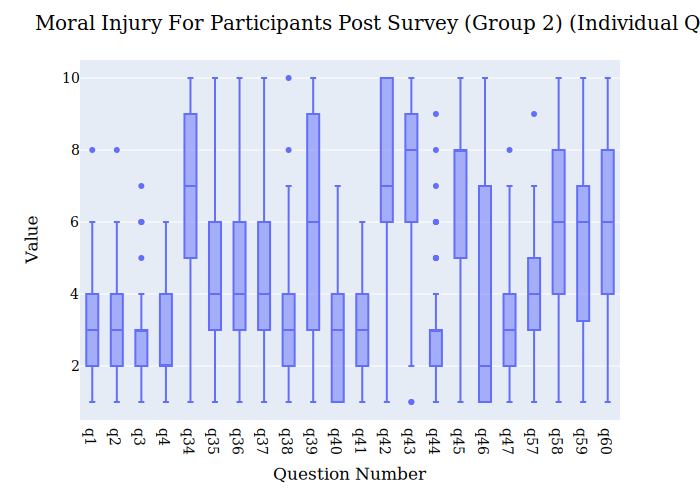

In [228]:
boxplotsByCategory(temp, moralInjuryQs, title = "Moral Injury For Participants Post Survey (Group 2) (Individual Questions)")

This graph feels too complicated, so let me put this into 1 boxplot.

In [229]:

def getCategoricalQsdf(df, categoryQs):
    '''
    Gets a subset of a dataframe that has questions in one specified category.
    Also gets a row sum.
    
    @param Dataframe df the given dataframe
    @param list categoryQs the list of questions (that came from 1 category)
    @return the new dataframe
    '''
    
    df = df[categoryQs]
    sumCol = df.sum(axis = 1).values
    avgCol = df.mean(axis = 1).values
    df["Sum"] = sumCol
    df["Average"] = avgCol
    return df

# tempMoralInjury = temp[moralInjuryQs].copy()

# tempMoralInjury["moralInjurySum"] = tempMoralInjury.sum(axis = 1)
# tempMoralInjury.head()



In [230]:
print(moralInjuryQs.shape[0])

22


In [231]:
tempMoralInjury = getCategoricalQsdf(temp, moralInjuryQs)
tempMoralInjury.head()

,q1,q2,q3,q4,q34,q35,q36,q37,q38,q39,...,q44,q45,q46,q47,q57,q58,q59,q60,Sum,Average
0,4,4,4,4,8,3,3,5,5,6,...,3,6,2,2,4,5,3,2,93,4.227273
1,5,5,6,6,6,5,5,5,5,9,...,1,9,6,5,4,3,3,2,108,4.909091
2,5,4,5,5,5,5,4,6,6,6,...,3,10,5,5,6,7,8,5,120,5.454545
3,4,2,2,1,8,3,2,2,3,10,...,3,1,1,2,2,3,2,1,74,3.363636
4,1,1,1,1,5,6,6,6,1,9,...,1,1,1,1,1,3,3,3,72,3.272727


In [470]:
def oneBoxplotByCategory(df, columnName = "Average", title = "Moral Injury Distribution Of All Participants", xLabel = "Moral Injury", yLabel = "Value"):


    fig = px.box(
            df, 
            y= columnName)
    fig.update_layout(
    #         barmode='stack', xaxis={'categoryorder':'total descending'},
        title= title,
        xaxis_title= xLabel,
        yaxis_title= yLabel,
        font=dict(
            family="Georgia",
            size=14,
    #         color="#7f7f7f"
            color = "black"
        )
    )
    fig.show(renderer = "svg")

In [471]:
# dfList = [preSurveyQs, temp]


def graphAllBoxplotCategory(df, surveyType):
    
    for myCategory in categoryQuestiondf["Category"].unique():
        QsForThatCategory = getCategoricalQs(category = myCategory)
        dfWithCategoricalQs = getCategoricalQsdf(df, QsForThatCategory)

        # for preSurvey
    #     dfWithCategoricalQs = getCategoricalQsdf(preSurveyQs, QsForThatCategory)
        myTitle = f"Average {myCategory} Distribution Of Participants ({surveyType})"

        oneBoxplotByCategory(dfWithCategoricalQs, title = myTitle, xLabel = myCategory)

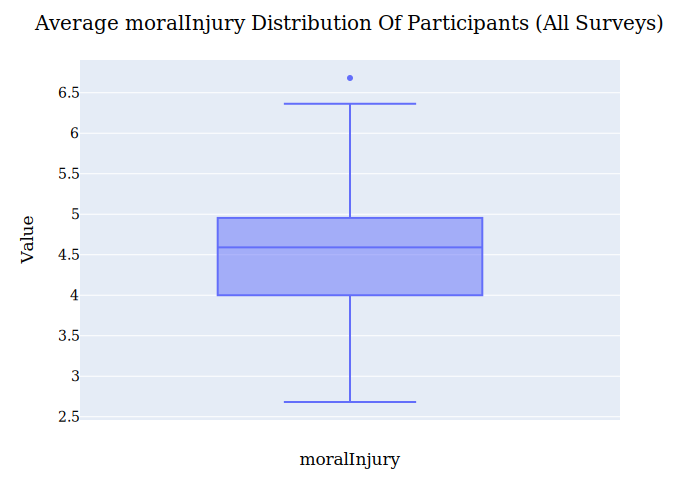

<ipython-input-229-167836884800>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-229-167836884800>:13: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



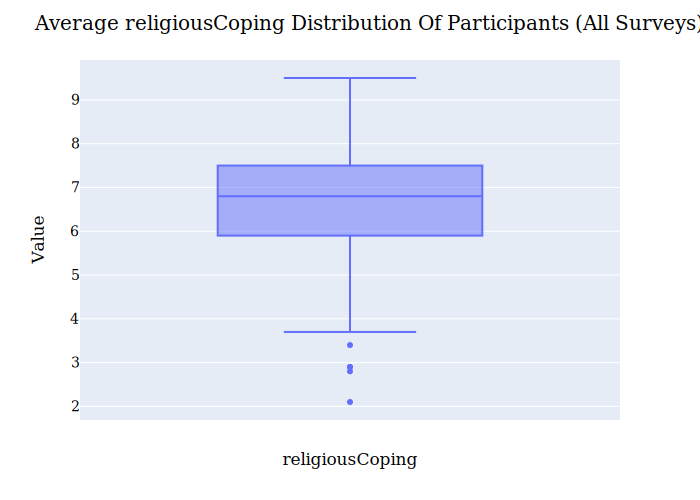

<ipython-input-229-167836884800>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-229-167836884800>:13: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



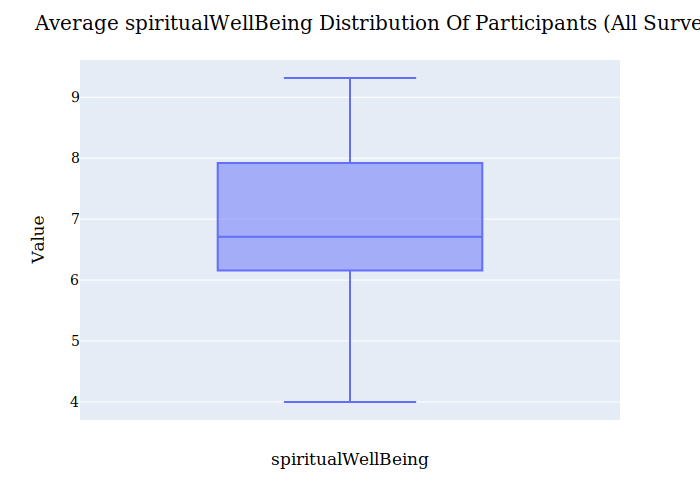

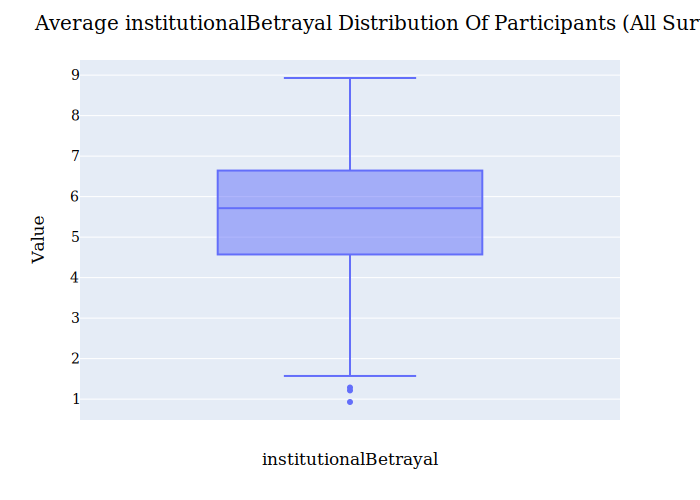

In [475]:
# preSurveyQs.merge(activeParticipants)


graphAllBoxplotCategory(preSurveyQs, "All Surveys")

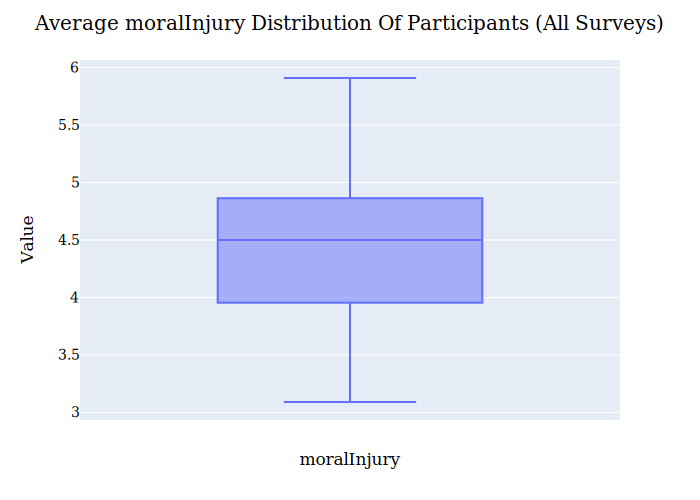

<ipython-input-229-167836884800>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-229-167836884800>:13: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



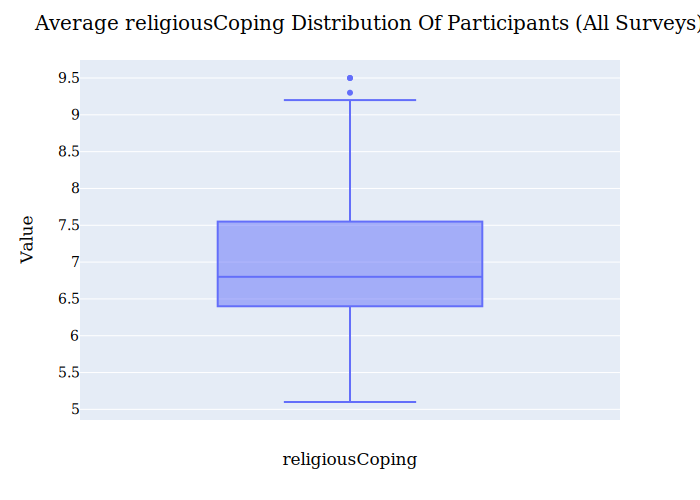

<ipython-input-229-167836884800>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-229-167836884800>:13: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



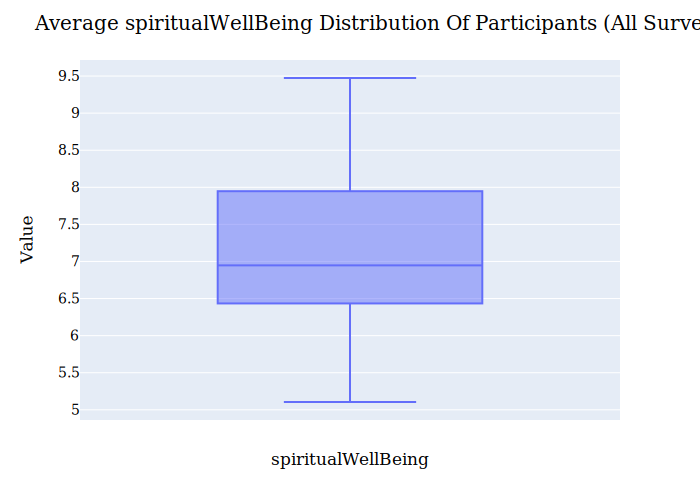

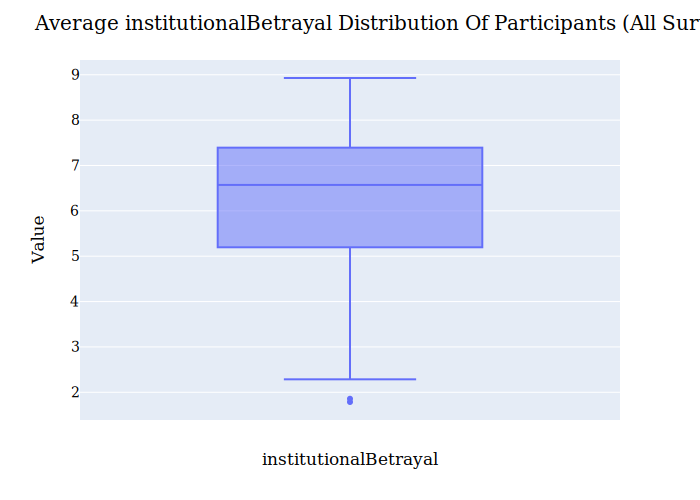

In [239]:
# Distributions of moral injury, religious coping, etc for Group 2 people
graphAllBoxplotCategory(temp, "All Surveys")

The above boxplots depict the boxplot distribution of average categories (moral injury, religious coping, etc) of each participant. For instance, for moral injury questions, I grabbed average score of moral injury for each person. Then, I plotted all participants' average moral injury into a boxplot. I did this for all other categories. 

For all the group 2 participants after the story, 

For moral injury, the median participant had a moral injuiry of 4.5. The minimum was 3.1, and the maximum average was 5.9. Distribution was relatively even. The range was 2.8.

For religious coping, the minimum was 5.1, median was 6.8, maximum was an outlier of 9.5. Excluding outliers, maximum was 9.2. The range was 4.4.

For spiritual well-being, the minimum was 5.1, median was 6.9, and maximum was 9.5. The distribution was relatively even. The range was 4.4.

For institutional betrayal, the minimum was an outlier 1.8. Excluding the outlier, the minimum was 2.3. The median was 6.6, the maximum was 9. The range was 7.2, including outliers. 

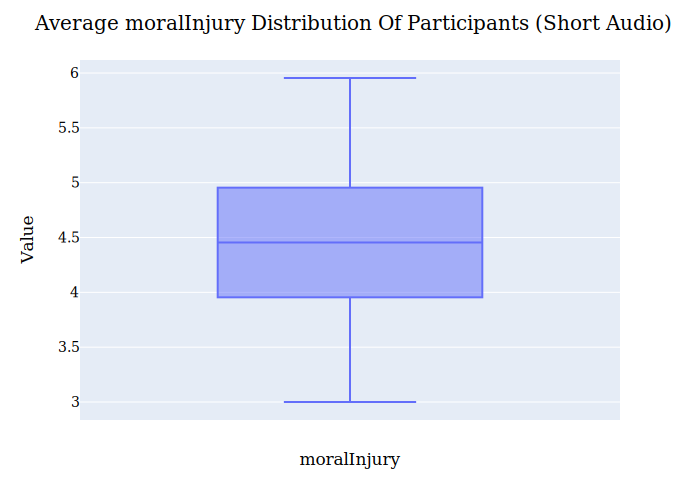

<ipython-input-229-167836884800>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-229-167836884800>:13: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



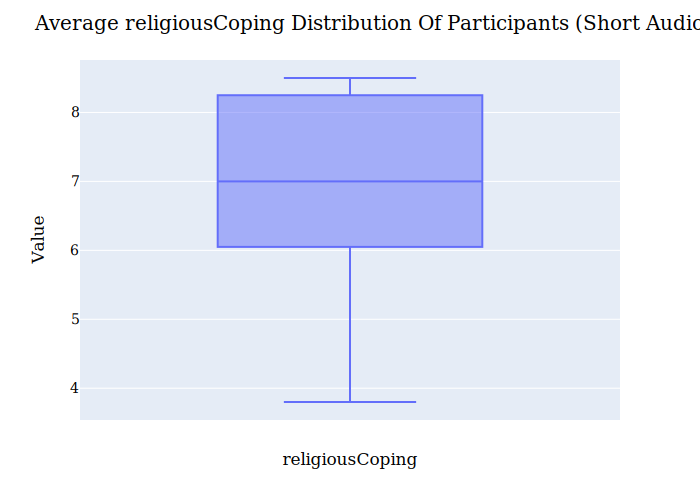

<ipython-input-229-167836884800>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-229-167836884800>:13: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



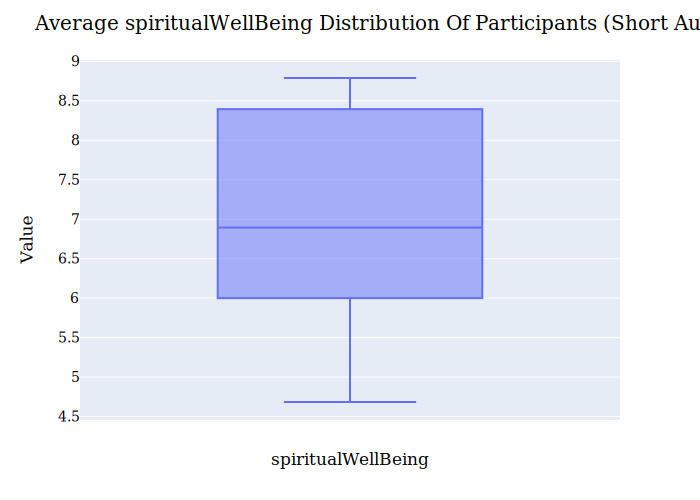

<ipython-input-229-167836884800>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-229-167836884800>:13: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



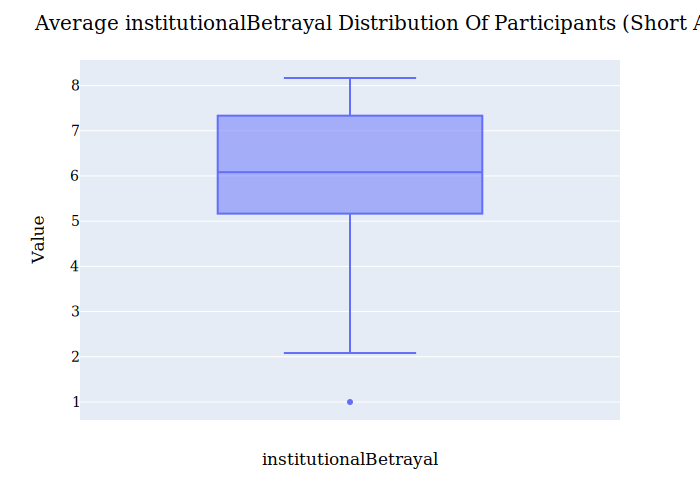

In [472]:
graphAllBoxplotCategory(postShortAudio, surveyType = "Short Audio")

For moral injury, the median participant had a moral injuiry of . The minimum was 3.1, and the maximum average was 5.9. Distribution was relatively even. The range was 2.8.

For religious coping, the minimum was 5.1, median was 6.8, maximum was an outlier of 9.5. Excluding outliers, maximum was 9.2. The range was 4.4.

For spiritual well-being, the minimum was 5.1, median was 6.9, and maximum was 9.5. The distribution was relatively even. The range was 4.4.

For institutional betrayal, the minimum was an outlier 1.8. Excluding the outlier, the minimum was 2.3. The median was 6.6, the maximum was 9. The range was 7.2, including outliers. 

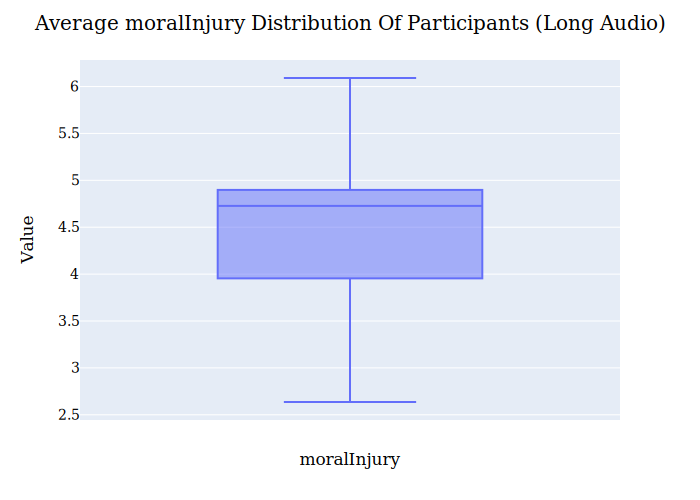

<ipython-input-229-167836884800>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-229-167836884800>:13: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



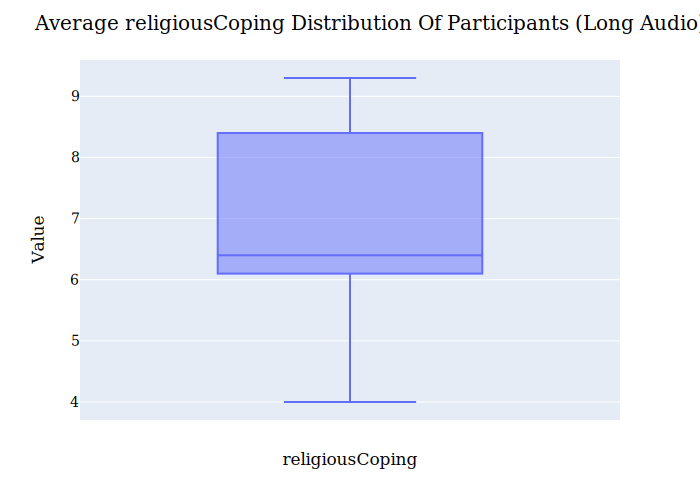

<ipython-input-229-167836884800>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-229-167836884800>:13: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



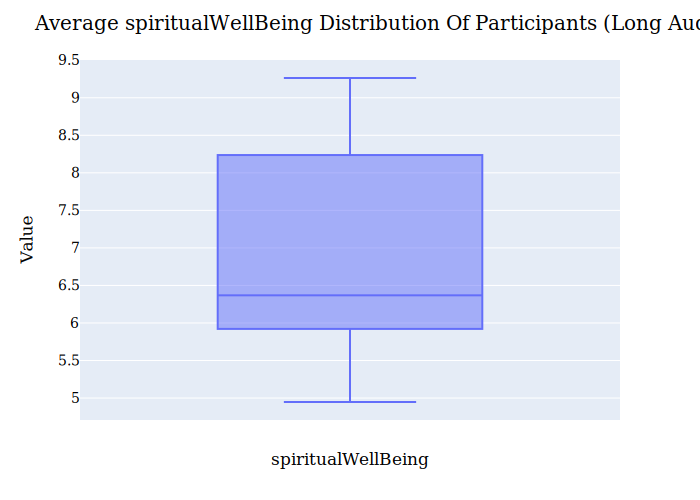

<ipython-input-229-167836884800>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-229-167836884800>:13: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



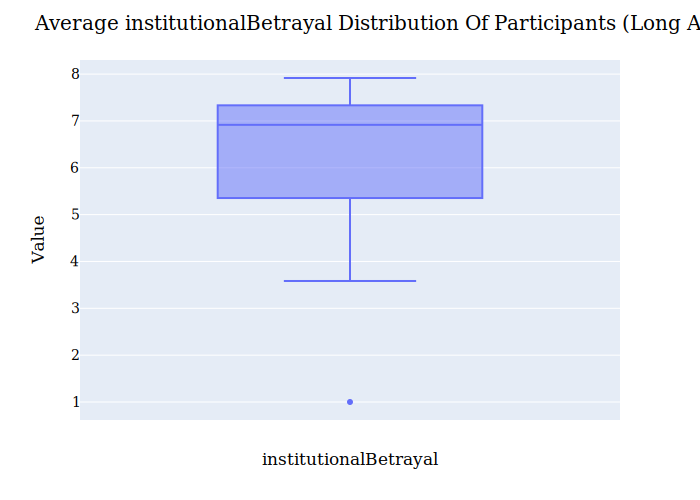

In [473]:
graphAllBoxplotCategory(postLongAudio, surveyType = "Long Audio")

In [234]:
# oneBoxplotByCategory(tempMoralInjury)

In [235]:
# # this happens to be 77. The last question number.
# lastQuestion = len(postAllHoffman2.iloc[:, 34:].columns)

# # Spawns: c1, c2, c3, ... c77
# newColsNames = [f"q{row + 1}" for row in range(0, lastQuestion, 1)]
# print(len(newColsNames))